# Quality of Life Scores Among Major U.S. Cities, Score Subset: Housing, Cost of Living, Travel Connectivity, Commute, Education

In [1]:
#import dependencies

import pandas as pd
import json
import numpy
import csv
import requests
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import scipy.stats as stats
import scipy.stats as linregress
import gmaps
import os

In [2]:
# Import json of list of cities we want to use for group project

my_file = '../Share/city_data.json'
with open(my_file ,'r') as f:
    data = json.loads(f.read())
# Flatten data
cities_df = pd.json_normalize(data)


In [3]:
#Turn data into dataframe grouped by state

cities_df.columns

Index(['datasetid', 'recordid', 'record_timestamp', 'fields.elevation',
       'fields.name', 'fields.modification_date', 'fields.country',
       'fields.feature_class', 'fields.admin3_code', 'fields.alternate_names',
       'fields.feature_code', 'fields.longitude', 'fields.geoname_id',
       'fields.timezone', 'fields.dem', 'fields.country_code',
       'fields.ascii_name', 'fields.latitude', 'fields.admin1_code',
       'fields.coordinates', 'fields.admin2_code', 'fields.population',
       'geometry.type', 'geometry.coordinates'],
      dtype='object')

In [4]:
cities_df = cities_df[['fields.name', 'fields.admin1_code', 'fields.country_code', 'fields.population', 'fields.latitude', 'fields.longitude']]

In [5]:
cities_df = cities_df.rename(columns={'fields.name': 'City', 'fields.admin1_code': 'State', 'fields.country_code': 'Country',
       'fields.population': 'Population', 'fields.latitude': 'Latitude', 'fields.longitude': 'Longitude'})

In [6]:
city_grp = cities_df.groupby(['State'])

In [7]:
#We want to use one city per state, with largest population in each state as decided upon by our group

lgst_cities = city_grp.apply(lambda g: g[g['Population'] == g['Population'].max()])

In [8]:
lgst_cities = lgst_cities.reset_index(drop=True)
lgst_cities

City State Country  Population  Latitude   Longitude
0           Anchorage    AK      US      298695  61.21806  -149.90028
1          Birmingham    AL      US      212461  33.52066   -86.80249
2         Little Rock    AR      US      197992  34.74648   -92.28959
3             Phoenix    AZ      US     1563025  33.44838  -112.07404
4         Los Angeles    CA      US     3971883  34.05223  -118.24368
5              Denver    CO      US      682545  39.73915   -104.9847
6          Bridgeport    CT      US      147629  41.17923   -73.18945
7          Washington    DC      US      601723  38.89511   -77.03637
8          Wilmington    DE      US       71948  39.74595   -75.54659
9        Jacksonville    FL      US      868031  30.33218   -81.65565
10            Atlanta    GA      US      463878    33.749   -84.38798
11           Honolulu    HI      US      371657  21.30694  -157.85833
12         Des Moines    IA      US      210330  41.60054   -93.60911
13              Boise    ID      US      145987   43.6135  -116.20345
14            Chicago    IL      US     2720546  41.85003   -87.65005
15       Indianapolis    IN      US      829718  39.76838   -86.15804
16            Wichita    KS      US      389965  37.69224   -97.33754
17  Lexington-Fayette    KY      US      314488   38.0498   -84.45855
18        New Orleans    LA      US      389617  29.95465   -90.07507
19             Boston    MA      US      667137  42.35843   -71.05977
20          Baltimore    MD      US      621849  39.29038   -76.61219
21           Portland    ME      US       66881  43.65737    -70.2589
22            Detroit    MI      US      677116  42.33143   -83.04575
23        Minneapolis    MN      US      410939  44.97997   -93.26384
24        Kansas City    MO      US      475378  39.09973   -94.57857
25            Jackson    MS      US      170674  32.29876   -90.18481
26           Billings    MT      US      110263  45.78329  -108.50069
27          Charlotte    NC      US      827097  35.22709   -80.84313
28              Fargo    ND      US      118523  46.87719    -96.7898
29              Omaha    NE      US      443885  41.25626   -95.94043
30         Manchester    NH      US      110229  42.99564   -71.45479
31             Newark    NJ      US      281944  40.73566   -74.17237
32        Albuquerque    NM      US      559121  35.08449  -106.65114
33          Las Vegas    NV      US      623747  36.17497  -115.13722
34      New York City    NY      US     8175133  40.71427   -74.00597
35           Columbus    OH      US      850106  39.96118   -82.99879
36      Oklahoma City    OK      US      631346  35.46756   -97.51643
37           Portland    OR      US      632309  45.52345  -122.67621
38       Philadelphia    PA      US     1567442  39.95233   -75.16379
39         Providence    RI      US      179207  41.82399   -71.41283
40           Columbia    SC      US      133803  34.00071   -81.03481
41        Sioux Falls    SD      US      171544  43.54997   -96.70033
42            Memphis    TN      US      655770  35.14953   -90.04898
43            Houston    TX      US     2296224  29.76328   -95.36327
44     Salt Lake City    UT      US      192672  40.76078  -111.89105
45     Virginia Beach    VA      US      452745  36.85293   -75.97799
46         Burlington    VT      US       42452  44.47588   -73.21207
47            Seattle    WA      US      684451  47.60621  -122.33207
48          Milwaukee    WI      US      600155   43.0389   -87.90647
49         Charleston    WV      US       49736  38.34982   -81.63262
50           Cheyenne    WY      US       63335  41.13998  -104.82025

In [9]:
#Create collumns for our new data from our API showing quality of life ratings for the cities we pre-selected
new_cols = ['Housing', 'Cost of Living', 'Startups', 'Venture Capital', 'Travel Connectivity', 'Commute', 'Business Freedom', 'Safety', 'Healthcare', 'Education', 'Environmental Quality', 'Taxation', 'Internet Access', 'Leisure & Culture']
for col in new_cols:
    lgst_cities[col] = ""
lgst_cities

City State Country  Population  Latitude   Longitude Housing  \
0           Anchorage    AK      US      298695  61.21806  -149.90028           
1          Birmingham    AL      US      212461  33.52066   -86.80249           
2         Little Rock    AR      US      197992  34.74648   -92.28959           
3             Phoenix    AZ      US     1563025  33.44838  -112.07404           
4         Los Angeles    CA      US     3971883  34.05223  -118.24368           
5              Denver    CO      US      682545  39.73915   -104.9847           
6          Bridgeport    CT      US      147629  41.17923   -73.18945           
7          Washington    DC      US      601723  38.89511   -77.03637           
8          Wilmington    DE      US       71948  39.74595   -75.54659           
9        Jacksonville    FL      US      868031  30.33218   -81.65565           
10            Atlanta    GA      US      463878    33.749   -84.38798           
11           Honolulu    HI      US      371657  21.30694  -157.85833           
12         Des Moines    IA      US      210330  41.60054   -93.60911           
13              Boise    ID      US      145987   43.6135  -116.20345           
14            Chicago    IL      US     2720546  41.85003   -87.65005           
15       Indianapolis    IN      US      829718  39.76838   -86.15804           
16            Wichita    KS      US      389965  37.69224   -97.33754           
17  Lexington-Fayette    KY      US      314488   38.0498   -84.45855           
18        New Orleans    LA      US      389617  29.95465   -90.07507           
19             Boston    MA      US      667137  42.35843   -71.05977           
20          Baltimore    MD      US      621849  39.29038   -76.61219           
21           Portland    ME      US       66881  43.65737    -70.2589           
22            Detroit    MI      US      677116  42.33143   -83.04575           
23        Minneapolis    MN      US      410939  44.97997   -93.26384           
24        Kansas City    MO      US      475378  39.09973   -94.57857           
25            Jackson    MS      US      170674  32.29876   -90.18481           
26           Billings    MT      US      110263  45.78329  -108.50069           
27          Charlotte    NC      US      827097  35.22709   -80.84313           
28              Fargo    ND      US      118523  46.87719    -96.7898           
29              Omaha    NE      US      443885  41.25626   -95.94043           
30         Manchester    NH      US      110229  42.99564   -71.45479           
31             Newark    NJ      US      281944  40.73566   -74.17237           
32        Albuquerque    NM      US      559121  35.08449  -106.65114           
33          Las Vegas    NV      US      623747  36.17497  -115.13722           
34      New York City    NY      US     8175133  40.71427   -74.00597           
35           Columbus    OH      US      850106  39.96118   -82.99879           
36      Oklahoma City    OK      US      631346  35.46756   -97.51643           
37           Portland    OR      US      632309  45.52345  -122.67621           
38       Philadelphia    PA      US     1567442  39.95233   -75.16379           
39         Providence    RI      US      179207  41.82399   -71.41283           
40           Columbia    SC      US      133803  34.00071   -81.03481           
41        Sioux Falls    SD      US      171544  43.54997   -96.70033           
42            Memphis    TN      US      655770  35.14953   -90.04898           
43            Houston    TX      US     2296224  29.76328   -95.36327           
44     Salt Lake City    UT      US      192672  40.76078  -111.89105           
45     Virginia Beach    VA      US      452745  36.85293   -75.97799           
46         Burlington    VT      US       42452  44.47588   -73.21207           
47            Seattle    WA      US      684451  47.60621  -122.33207           
48          Milwaukee    WI      US      600155 

In [10]:
#MAKE REQUEST AND STORE DATA BACK IN DATAFRAME

#The URL will only let you find the city in an urban area and then push the
#urban area into the query - it's nested.  They provide some instructions, 
#but their example is wrong, so don't follow that.  The instructions are:  
#"Alternatively, we can find the Urban Area that a city belongs to. E.g. let
#'s find out how the urban area corresponding to Palo Alto, 
#California performs in terms of Teleport scores. 
#Let's use the API Explorer for the city search endpoint to construct the 
#URL. In the search field enter Palo Alto, California, in the embed field, 
#type city:search-results/city:item/city:urban_area/ua:scores, and click 
#the Try it out! button." -Notes from Paul

#Base URL 
url_open = 'https://api.teleport.org/api/cities/?search='
url_close = "&limit=1&embed=city%3Asearch-results%2Fcity%3Aitem%2Fcity%3Aurban_area%2Fua%3Ascores"

#create a list to loop to gather json data from response
my_categories = pd.DataFrame(new_cols)

print("""
Beginning processing city data:
------------------------------------------""")

#loop dataframe randomly created above and return quality of life data / 
#use the index so the return data can be pushed into the existing 
#lgst_cities dataframe

for ind in lgst_cities.index:

    #get city data and transform 
    my_city = lgst_cities['City'][ind].replace(' ', '%20')
    my_state = lgst_cities['State'][ind]

    urban_area = my_city + '%2C%20' + my_state

    # Build query URL
    query_url = f"{url_open}{urban_area}{url_close}"

    #make request and hold response
    response = requests.get(query_url).json()
    
    try:
        print(f"Processing Record {ind + 1} of {len(lgst_cities)}: {my_city}, {my_state}.")
        
        #gather data for each category
        for x in my_categories.index:
                    
            my_category = my_categories.iloc[x, 0]
                    
            #parse json for data
            my_data = response['_embedded']['city:search-results'][0]['_embedded']['city:item']['_embedded']['city:urban_area']['_embedded']['ua:scores']['categories'][x]['score_out_of_10']
                    
            #write the data to the dataframe
            lgst_cities.loc[lgst_cities.index[ind], my_category] = my_data

    except (KeyError, IndexError):
        print("Missing field/result... skipping.")



Beginning processing city data:
------------------------------------------
Processing Record 1 of 51: Anchorage, AK.
Processing Record 2 of 51: Birmingham, AL.
Processing Record 3 of 51: Little%20Rock, AR.
Missing field/result... skipping.
Processing Record 4 of 51: Phoenix, AZ.
Processing Record 5 of 51: Los%20Angeles, CA.
Processing Record 6 of 51: Denver, CO.
Processing Record 7 of 51: Bridgeport, CT.
Missing field/result... skipping.
Processing Record 8 of 51: Washington, DC.
Processing Record 9 of 51: Wilmington, DE.
Missing field/result... skipping.
Processing Record 10 of 51: Jacksonville, FL.
Processing Record 11 of 51: Atlanta, GA.
Processing Record 12 of 51: Honolulu, HI.
Processing Record 13 of 51: Des%20Moines, IA.
Processing Record 14 of 51: Boise, ID.
Processing Record 15 of 51: Chicago, IL.
Processing Record 16 of 51: Indianapolis, IN.
Processing Record 17 of 51: Wichita, KS.
Missing field/result... skipping.
Processing Record 18 of 51: Lexington-Fayette, KY.
Missing fi

In [11]:
lgst_cities

City State Country  Population  Latitude   Longitude Housing  \
0           Anchorage    AK      US      298695  61.21806  -149.90028  5.4335   
1          Birmingham    AL      US      212461  33.52066   -86.80249  6.5555   
2         Little Rock    AR      US      197992  34.74648   -92.28959           
3             Phoenix    AZ      US     1563025  33.44838  -112.07404   6.533   
4         Los Angeles    CA      US     3971883  34.05223  -118.24368  1.5275   
5              Denver    CO      US      682545  39.73915   -104.9847  3.8375   
6          Bridgeport    CT      US      147629  41.17923   -73.18945           
7          Washington    DC      US      601723  38.89511   -77.03637  1.2105   
8          Wilmington    DE      US       71948  39.74595   -75.54659           
9        Jacksonville    FL      US      868031  30.33218   -81.65565    6.45   
10            Atlanta    GA      US      463878    33.749   -84.38798  4.9755   
11           Honolulu    HI      US      371657  21.30694  -157.85833  2.3415   
12         Des Moines    IA      US      210330  41.60054   -93.60911   6.851   
13              Boise    ID      US      145987   43.6135  -116.20345  6.9635   
14            Chicago    IL      US     2720546  41.85003   -87.65005   3.702   
15       Indianapolis    IN      US      829718  39.76838   -86.15804   6.266   
16            Wichita    KS      US      389965  37.69224   -97.33754           
17  Lexington-Fayette    KY      US      314488   38.0498   -84.45855           
18        New Orleans    LA      US      389617  29.95465   -90.07507   5.339   
19             Boston    MA      US      667137  42.35843   -71.05977       1   
20          Baltimore    MD      US      621849  39.29038   -76.61219    4.83   
21           Portland    ME      US       66881  43.65737    -70.2589       0   
22            Detroit    MI      US      677116  42.33143   -83.04575   6.223   
23        Minneapolis    MN      US      410939  44.97997   -93.26384  4.7385   
24        Kansas City    MO      US      475378  39.09973   -94.57857  6.7075   
25            Jackson    MS      US      170674  32.29876   -90.18481           
26           Billings    MT      US      110263  45.78329  -108.50069           
27          Charlotte    NC      US      827097  35.22709   -80.84313   5.549   
28              Fargo    ND      US      118523  46.87719    -96.7898           
29              Omaha    NE      US      443885  41.25626   -95.94043  7.0405   
30         Manchester    NH      US      110229  42.99564   -71.45479           
31             Newark    NJ      US      281944  40.73566   -74.17237       1   
32        Albuquerque    NM      US      559121  35.08449  -106.65114   7.262   
33          Las Vegas    NV      US      623747  36.17497  -115.13722   7.001   
34      New York City    NY      US     8175133  40.71427   -74.00597       1   
35           Columbus    OH      US      850106  39.96118   -82.99879  6.2895   
36      Oklahoma City    OK      US      631346  35.46756   -97.51643   7.261   
37           Portland    OR      US      632309  45.52345  -122.67621   4.138   
38       Philadelphia    PA      US     1567442  39.95233   -75.16379   4.207   
39         Providence    RI      US      179207  41.82399   -71.41283   3.153   
40           Columbia    SC      US      133803  34.00071   -81.03481           
41        Sioux Falls    SD      US      171544  43.54997   -96.70033           
42            Memphis    TN      US      655770  35.14953   -90.04898  7.1145   
43            Houston    TX      US     2296224  29.76328   -95.36327  5.2245   
44     Salt Lake City    UT      US      192672  40.76078  -111.89105   6.141   
45     Virginia Beach    VA      US      452745  36.85293   -75.97799           
46         Burlington    VT      US       42452  44.47588   -73.21207           
47            Seattle    WA      US      684451  47.60621  -122.33207   2.291   
48          Milwaukee    WI      US      600155 

In [12]:
#Drop the data that will not be reviewed in this code
df= lgst_cities.drop(['Startups','Venture Capital','Business Freedom','Safety','Healthcare','Environmental Quality','Taxation','Internet Access','Leisure & Culture'], axis=1)
df

City State Country  Population  Latitude   Longitude Housing  \
0           Anchorage    AK      US      298695  61.21806  -149.90028  5.4335   
1          Birmingham    AL      US      212461  33.52066   -86.80249  6.5555   
2         Little Rock    AR      US      197992  34.74648   -92.28959           
3             Phoenix    AZ      US     1563025  33.44838  -112.07404   6.533   
4         Los Angeles    CA      US     3971883  34.05223  -118.24368  1.5275   
5              Denver    CO      US      682545  39.73915   -104.9847  3.8375   
6          Bridgeport    CT      US      147629  41.17923   -73.18945           
7          Washington    DC      US      601723  38.89511   -77.03637  1.2105   
8          Wilmington    DE      US       71948  39.74595   -75.54659           
9        Jacksonville    FL      US      868031  30.33218   -81.65565    6.45   
10            Atlanta    GA      US      463878    33.749   -84.38798  4.9755   
11           Honolulu    HI      US      371657  21.30694  -157.85833  2.3415   
12         Des Moines    IA      US      210330  41.60054   -93.60911   6.851   
13              Boise    ID      US      145987   43.6135  -116.20345  6.9635   
14            Chicago    IL      US     2720546  41.85003   -87.65005   3.702   
15       Indianapolis    IN      US      829718  39.76838   -86.15804   6.266   
16            Wichita    KS      US      389965  37.69224   -97.33754           
17  Lexington-Fayette    KY      US      314488   38.0498   -84.45855           
18        New Orleans    LA      US      389617  29.95465   -90.07507   5.339   
19             Boston    MA      US      667137  42.35843   -71.05977       1   
20          Baltimore    MD      US      621849  39.29038   -76.61219    4.83   
21           Portland    ME      US       66881  43.65737    -70.2589       0   
22            Detroit    MI      US      677116  42.33143   -83.04575   6.223   
23        Minneapolis    MN      US      410939  44.97997   -93.26384  4.7385   
24        Kansas City    MO      US      475378  39.09973   -94.57857  6.7075   
25            Jackson    MS      US      170674  32.29876   -90.18481           
26           Billings    MT      US      110263  45.78329  -108.50069           
27          Charlotte    NC      US      827097  35.22709   -80.84313   5.549   
28              Fargo    ND      US      118523  46.87719    -96.7898           
29              Omaha    NE      US      443885  41.25626   -95.94043  7.0405   
30         Manchester    NH      US      110229  42.99564   -71.45479           
31             Newark    NJ      US      281944  40.73566   -74.17237       1   
32        Albuquerque    NM      US      559121  35.08449  -106.65114   7.262   
33          Las Vegas    NV      US      623747  36.17497  -115.13722   7.001   
34      New York City    NY      US     8175133  40.71427   -74.00597       1   
35           Columbus    OH      US      850106  39.96118   -82.99879  6.2895   
36      Oklahoma City    OK      US      631346  35.46756   -97.51643   7.261   
37           Portland    OR      US      632309  45.52345  -122.67621   4.138   
38       Philadelphia    PA      US     1567442  39.95233   -75.16379   4.207   
39         Providence    RI      US      179207  41.82399   -71.41283   3.153   
40           Columbia    SC      US      133803  34.00071   -81.03481           
41        Sioux Falls    SD      US      171544  43.54997   -96.70033           
42            Memphis    TN      US      655770  35.14953   -90.04898  7.1145   
43            Houston    TX      US     2296224  29.76328   -95.36327  5.2245   
44     Salt Lake City    UT      US      192672  40.76078  -111.89105   6.141   
45     Virginia Beach    VA      US      452745  36.85293   -75.97799           
46         Burlington    VT      US       42452  44.47588   -73.21207           
47            Seattle    WA      US      684451  47.60621  -122.33207   2.291   
48          Milwaukee    WI      US      600155 

In [13]:
#Clean the missing data

nan_value = float("NaN")
df.replace("", nan_value, inplace=True)

df.dropna(inplace=True)

df

City State Country  Population  Latitude   Longitude  Housing  \
0        Anchorage    AK      US      298695  61.21806  -149.90028   5.4335   
1       Birmingham    AL      US      212461  33.52066   -86.80249   6.5555   
3          Phoenix    AZ      US     1563025  33.44838  -112.07404   6.5330   
4      Los Angeles    CA      US     3971883  34.05223  -118.24368   1.5275   
5           Denver    CO      US      682545  39.73915   -104.9847   3.8375   
7       Washington    DC      US      601723  38.89511   -77.03637   1.2105   
9     Jacksonville    FL      US      868031  30.33218   -81.65565   6.4500   
10         Atlanta    GA      US      463878    33.749   -84.38798   4.9755   
11        Honolulu    HI      US      371657  21.30694  -157.85833   2.3415   
12      Des Moines    IA      US      210330  41.60054   -93.60911   6.8510   
13           Boise    ID      US      145987   43.6135  -116.20345   6.9635   
14         Chicago    IL      US     2720546  41.85003   -87.65005   3.7020   
15    Indianapolis    IN      US      829718  39.76838   -86.15804   6.2660   
18     New Orleans    LA      US      389617  29.95465   -90.07507   5.3390   
19          Boston    MA      US      667137  42.35843   -71.05977   1.0000   
20       Baltimore    MD      US      621849  39.29038   -76.61219   4.8300   
21        Portland    ME      US       66881  43.65737    -70.2589   0.0000   
22         Detroit    MI      US      677116  42.33143   -83.04575   6.2230   
23     Minneapolis    MN      US      410939  44.97997   -93.26384   4.7385   
24     Kansas City    MO      US      475378  39.09973   -94.57857   6.7075   
27       Charlotte    NC      US      827097  35.22709   -80.84313   5.5490   
29           Omaha    NE      US      443885  41.25626   -95.94043   7.0405   
31          Newark    NJ      US      281944  40.73566   -74.17237   1.0000   
32     Albuquerque    NM      US      559121  35.08449  -106.65114   7.2620   
33       Las Vegas    NV      US      623747  36.17497  -115.13722   7.0010   
34   New York City    NY      US     8175133  40.71427   -74.00597   1.0000   
35        Columbus    OH      US      850106  39.96118   -82.99879   6.2895   
36   Oklahoma City    OK      US      631346  35.46756   -97.51643   7.2610   
37        Portland    OR      US      632309  45.52345  -122.67621   4.1380   
38    Philadelphia    PA      US     1567442  39.95233   -75.16379   4.2070   
39      Providence    RI      US      179207  41.82399   -71.41283   3.1530   
42         Memphis    TN      US      655770  35.14953   -90.04898   7.1145   
43         Houston    TX      US     2296224  29.76328   -95.36327   5.2245   
44  Salt Lake City    UT      US      192672  40.76078  -111.89105   6.1410   
47         Seattle    WA      US      684451  47.60621  -122.33207   2.2910   
48       Milwaukee    WI      US      600155   43.0389   -87.90647   6.1225   

    Cost of Living  Travel Connectivity  Commute  Education  
0            3.141               1.7380  4.71525     3.6245  
1            5.133               1.4355  2.02075     3.6245  
3            6.208               3.3025  4.82850     4.5910  
4            4.556               3.9585  3.67700     8.6245  
5            5.102               4.2430  4.53000     3.6245  
7            3.595               4.5050  4.45700     5.9685  
9            5.359               1.5675  1.40575     3.6245  
10           5.241               5.2915  3.89775     6.4570  
11           2.867               1.9830  4.16175     4.2805  
12           6.327               1.3790  2.07225     3.6245  
13           6.578               1.3235  5.22500     3.6245  
14           4.766               5.5075  4.57975     7.9990  
15           5.478               1.6815  4.85875     3.6245  
18           4.992               1.7570  4.62750     4.1520  
19           4.259               3.2150  4.39625     8.6245  
20           4.982               3.6665  4.93475     5.8805  
21           0.000               1.1

In [14]:
df=df.reset_index()
df.head(3)

index        City State Country  Population  Latitude   Longitude  Housing  \
0      0   Anchorage    AK      US      298695  61.21806  -149.90028   5.4335   
1      1  Birmingham    AL      US      212461  33.52066   -86.80249   6.5555   
2      3     Phoenix    AZ      US     1563025  33.44838  -112.07404   6.5330   

   Cost of Living  Travel Connectivity  Commute  Education  
0           3.141               1.7380  4.71525     3.6245  
1           5.133               1.4355  2.02075     3.6245  
2           6.208               3.3025  4.82850     4.5910

In [15]:
df=df.drop(columns=['index'])
df

City State Country  Population  Latitude   Longitude  Housing  \
0        Anchorage    AK      US      298695  61.21806  -149.90028   5.4335   
1       Birmingham    AL      US      212461  33.52066   -86.80249   6.5555   
2          Phoenix    AZ      US     1563025  33.44838  -112.07404   6.5330   
3      Los Angeles    CA      US     3971883  34.05223  -118.24368   1.5275   
4           Denver    CO      US      682545  39.73915   -104.9847   3.8375   
5       Washington    DC      US      601723  38.89511   -77.03637   1.2105   
6     Jacksonville    FL      US      868031  30.33218   -81.65565   6.4500   
7          Atlanta    GA      US      463878    33.749   -84.38798   4.9755   
8         Honolulu    HI      US      371657  21.30694  -157.85833   2.3415   
9       Des Moines    IA      US      210330  41.60054   -93.60911   6.8510   
10           Boise    ID      US      145987   43.6135  -116.20345   6.9635   
11         Chicago    IL      US     2720546  41.85003   -87.65005   3.7020   
12    Indianapolis    IN      US      829718  39.76838   -86.15804   6.2660   
13     New Orleans    LA      US      389617  29.95465   -90.07507   5.3390   
14          Boston    MA      US      667137  42.35843   -71.05977   1.0000   
15       Baltimore    MD      US      621849  39.29038   -76.61219   4.8300   
16        Portland    ME      US       66881  43.65737    -70.2589   0.0000   
17         Detroit    MI      US      677116  42.33143   -83.04575   6.2230   
18     Minneapolis    MN      US      410939  44.97997   -93.26384   4.7385   
19     Kansas City    MO      US      475378  39.09973   -94.57857   6.7075   
20       Charlotte    NC      US      827097  35.22709   -80.84313   5.5490   
21           Omaha    NE      US      443885  41.25626   -95.94043   7.0405   
22          Newark    NJ      US      281944  40.73566   -74.17237   1.0000   
23     Albuquerque    NM      US      559121  35.08449  -106.65114   7.2620   
24       Las Vegas    NV      US      623747  36.17497  -115.13722   7.0010   
25   New York City    NY      US     8175133  40.71427   -74.00597   1.0000   
26        Columbus    OH      US      850106  39.96118   -82.99879   6.2895   
27   Oklahoma City    OK      US      631346  35.46756   -97.51643   7.2610   
28        Portland    OR      US      632309  45.52345  -122.67621   4.1380   
29    Philadelphia    PA      US     1567442  39.95233   -75.16379   4.2070   
30      Providence    RI      US      179207  41.82399   -71.41283   3.1530   
31         Memphis    TN      US      655770  35.14953   -90.04898   7.1145   
32         Houston    TX      US     2296224  29.76328   -95.36327   5.2245   
33  Salt Lake City    UT      US      192672  40.76078  -111.89105   6.1410   
34         Seattle    WA      US      684451  47.60621  -122.33207   2.2910   
35       Milwaukee    WI      US      600155   43.0389   -87.90647   6.1225   

    Cost of Living  Travel Connectivity  Commute  Education  
0            3.141               1.7380  4.71525     3.6245  
1            5.133               1.4355  2.02075     3.6245  
2            6.208               3.3025  4.82850     4.5910  
3            4.556               3.9585  3.67700     8.6245  
4            5.102               4.2430  4.53000     3.6245  
5            3.595               4.5050  4.45700     5.9685  
6            5.359               1.5675  1.40575     3.6245  
7            5.241               5.2915  3.89775     6.4570  
8            2.867               1.9830  4.16175     4.2805  
9            6.327               1.3790  2.07225     3.6245  
10           6.578               1.3235  5.22500     3.6245  
11           4.766               5.5075  4.57975     7.9990  
12           5.478               1.6815  4.85875     3.6245  
13           4.992               1.7570  4.62750     4.1520  
14           4.259               3.2150  4.39625     8.6245  
15           4.982               3.6665  4.93475     5.8805  
16           0.000               1.1

In [16]:
#Add a total score column for city comparison purposes

column_list=list(df)
column_list
column_list.remove('City')
column_list.remove('State')
column_list.remove('Country')
column_list.remove('Population')
column_list.remove('Latitude')
column_list.remove('Longitude')
column_list
df['Total Score']=df[column_list].sum(axis=1)
df
qol_df=df
qol_df

City State Country  Population  Latitude   Longitude  Housing  \
0        Anchorage    AK      US      298695  61.21806  -149.90028   5.4335   
1       Birmingham    AL      US      212461  33.52066   -86.80249   6.5555   
2          Phoenix    AZ      US     1563025  33.44838  -112.07404   6.5330   
3      Los Angeles    CA      US     3971883  34.05223  -118.24368   1.5275   
4           Denver    CO      US      682545  39.73915   -104.9847   3.8375   
5       Washington    DC      US      601723  38.89511   -77.03637   1.2105   
6     Jacksonville    FL      US      868031  30.33218   -81.65565   6.4500   
7          Atlanta    GA      US      463878    33.749   -84.38798   4.9755   
8         Honolulu    HI      US      371657  21.30694  -157.85833   2.3415   
9       Des Moines    IA      US      210330  41.60054   -93.60911   6.8510   
10           Boise    ID      US      145987   43.6135  -116.20345   6.9635   
11         Chicago    IL      US     2720546  41.85003   -87.65005   3.7020   
12    Indianapolis    IN      US      829718  39.76838   -86.15804   6.2660   
13     New Orleans    LA      US      389617  29.95465   -90.07507   5.3390   
14          Boston    MA      US      667137  42.35843   -71.05977   1.0000   
15       Baltimore    MD      US      621849  39.29038   -76.61219   4.8300   
16        Portland    ME      US       66881  43.65737    -70.2589   0.0000   
17         Detroit    MI      US      677116  42.33143   -83.04575   6.2230   
18     Minneapolis    MN      US      410939  44.97997   -93.26384   4.7385   
19     Kansas City    MO      US      475378  39.09973   -94.57857   6.7075   
20       Charlotte    NC      US      827097  35.22709   -80.84313   5.5490   
21           Omaha    NE      US      443885  41.25626   -95.94043   7.0405   
22          Newark    NJ      US      281944  40.73566   -74.17237   1.0000   
23     Albuquerque    NM      US      559121  35.08449  -106.65114   7.2620   
24       Las Vegas    NV      US      623747  36.17497  -115.13722   7.0010   
25   New York City    NY      US     8175133  40.71427   -74.00597   1.0000   
26        Columbus    OH      US      850106  39.96118   -82.99879   6.2895   
27   Oklahoma City    OK      US      631346  35.46756   -97.51643   7.2610   
28        Portland    OR      US      632309  45.52345  -122.67621   4.1380   
29    Philadelphia    PA      US     1567442  39.95233   -75.16379   4.2070   
30      Providence    RI      US      179207  41.82399   -71.41283   3.1530   
31         Memphis    TN      US      655770  35.14953   -90.04898   7.1145   
32         Houston    TX      US     2296224  29.76328   -95.36327   5.2245   
33  Salt Lake City    UT      US      192672  40.76078  -111.89105   6.1410   
34         Seattle    WA      US      684451  47.60621  -122.33207   2.2910   
35       Milwaukee    WI      US      600155   43.0389   -87.90647   6.1225   

    Cost of Living  Travel Connectivity  Commute  Education  Total Score  
0            3.141               1.7380  4.71525     3.6245     18.65225  
1            5.133               1.4355  2.02075     3.6245     18.76925  
2            6.208               3.3025  4.82850     4.5910     25.46300  
3            4.556               3.9585  3.67700     8.6245     22.34350  
4            5.102               4.2430  4.53000     3.6245     21.33700  
5            3.595               4.5050  4.45700     5.9685     19.73600  
6            5.359               1.5675  1.40575     3.6245     18.40675  
7            5.241               5.2915  3.89775     6.4570     25.86275  
8            2.867               1.9830  4.16175     4.2805     15.63375  
9            6.327               1.3790  2.07225     3.6245     20.25375  
10           6.578               1.3235  5.22500     3.6245     23.71450  
11           4.766               5.5075  4.57975     7.9990     26.55425  
12           5.478               1.6815  4.85875     3.6245     21.90875  
13           4.992               1.7570 

In [17]:
#Look at statistical data among the scores

qol_df.to_csv("CityScoresOriginal.csv")
qol_df.describe()

Population    Housing  Cost of Living  Travel Connectivity  \
count  3.600000e+01  36.000000       36.000000            36.000000   
mean   9.847224e+05   4.785542        4.776389             2.922931   
std    1.458472e+06   2.190898        1.618827             1.527034   
min    6.688100e+04   0.000000        0.000000             1.102000   
25%    3.851270e+05   3.564750        4.381250             1.643000   
50%    6.227980e+05   5.386250        5.117500             2.810750   
75%    8.277522e+05   6.538625        5.881500             3.669625   
max    8.175133e+06   7.262000        6.578000             6.675000   

         Commute  Education  Total Score  
count  36.000000  36.000000    36.000000  
mean    3.967465   4.970806    21.423132  
std     1.306818   1.602809     3.722342  
min     0.933000   3.624500     6.696750  
25%     3.363250   3.624500    20.114625  
50%     4.526875   4.248000    22.150750  
75%     4.909750   5.834000    23.729063  
max     5.519250   8.624500    26.554250

In [18]:
#Create variables for our columns for graphing purposes

cities= qol_df['City']
housing= qol_df['Housing'].astype('float')
living= qol_df['Cost of Living'].astype('float')
travel= qol_df['Travel Connectivity'].astype('float')
commute= qol_df['Commute'].astype('float')
education= qol_df['Education'].astype('float')
pop= qol_df['Population'].astype('float')
lat= qol_df['Latitude'].astype('float')
lon= qol_df['Longitude'].astype('float')
state= qol_df['State']
total= qol_df['Total Score'].astype('float')

# Housing Score Heat Map

In [19]:
# Create a map usingcoordinates to set markers

marker_locations = qol_df[['Latitude', 'Longitude']].astype(float)

# Create a heat_layer 

fig = gmaps.figure()

heat_layer = gmaps.heatmap_layer(marker_locations, weights = housing,
                                 dissipating=False, max_intensity=np.max(housing), 
                                point_radius=3.0)
fig.add_layer(heat_layer)
fig

Figure(layout=FigureLayout(height='420px'))

# Cost of Living Score Heat Map

In [20]:
# Create a map usingcoordinates to set markers

marker_locations = qol_df[['Latitude', 'Longitude']].astype(float)

# Create a heat_layer 

fig = gmaps.figure()

heat_layer = gmaps.heatmap_layer(marker_locations, weights = living,
                                 dissipating=False, max_intensity=np.max(living), 
                                point_radius=3.0)
fig.add_layer(heat_layer)
fig

Figure(layout=FigureLayout(height='420px'))

# Travel Connectivity Score Heat Map

In [21]:
# Create a map usingcoordinates to set markers
marker_locations = qol_df[['Latitude', 'Longitude']].astype(float)

# Create a heat_layer 
fig = gmaps.figure()

heat_layer = gmaps.heatmap_layer(marker_locations, weights = travel,
                                 dissipating=False, max_intensity=np.max(travel), 
                                point_radius=3.0)
fig.add_layer(heat_layer)
fig

Figure(layout=FigureLayout(height='420px'))

# Commute Score Heat Map

In [22]:
marker_locations = qol_df[['Latitude', 'Longitude']].astype(float)

# Create a heat_layer 
fig = gmaps.figure()

heat_layer = gmaps.heatmap_layer(marker_locations, weights = commute,
                                 dissipating=False, max_intensity=np.max(commute), 
                                point_radius=3.0)
fig.add_layer(heat_layer)
fig

Figure(layout=FigureLayout(height='420px'))

# Education Score Heat Map

In [23]:
marker_locations = qol_df[['Latitude', 'Longitude']].astype(float)

# Create a heat_layer 
fig = gmaps.figure()

heat_layer = gmaps.heatmap_layer(marker_locations, weights = education,
                                 dissipating=False, max_intensity=np.max(education), 
                                point_radius=3.0)
fig.add_layer(heat_layer)
fig

Figure(layout=FigureLayout(height='420px'))

# Population Density Heat Map

In [24]:
marker_locations = qol_df[['Latitude', 'Longitude']].astype(float)

# Create a heat_layer 
fig = gmaps.figure()

heat_layer = gmaps.heatmap_layer(marker_locations, weights = pop,
                                 dissipating=False, max_intensity=np.max(pop), 
                                point_radius=3.0)
fig.add_layer(heat_layer)
fig

Figure(layout=FigureLayout(height='420px'))

# City Locations Map with City Names

In [25]:
info_box_template = """
<dl>
<dt>Name</dt><dd>{State Name}</dd>
<dt>City</dt><dd>{City}</dd>
<dt>Country</dt><dd>{Country}</dd>
</dl>
"""
# Store the DataFrame Row
# NOTE: be sure to update with your DataFrame name
locations = qol_df[["Latitude", "Longitude"]].astype(float)

# Create a heat_layer 
fig = gmaps.figure()

heat_layer = gmaps.heatmap_layer(locations, weights = pop,
                                 dissipating=False, max_intensity=np.max(pop), 
                                point_radius=3.0)
fig.add_layer(heat_layer)

markers = gmaps.marker_layer(locations, info_box_content=info_box_template)
fig.add_layer(markers)

# Display figure
fig

Figure(layout=FigureLayout(height='420px'))

In [26]:
# Create a map usingcoordinates to set markers

marker_locations = qol_df[['Latitude', 'Longitude']].astype(float)

# Create a heat_layer 

fig = gmaps.figure()

heat_layer = gmaps.heatmap_layer(marker_locations, weights = total,
                                 dissipating=False, max_intensity=np.max(total), 
                                point_radius=2.0)
fig.add_layer(heat_layer)
fig

Figure(layout=FigureLayout(height='420px'))

# Box Plot Comparing Scores

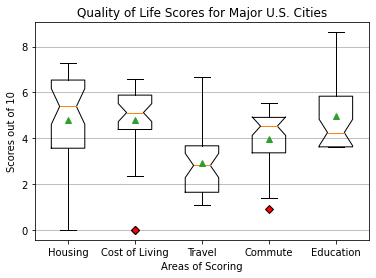

In [27]:
labels = ['Housing', 'Cost of Living', 'Travel', 'Commute',
          'Education']

areas= [housing, living, travel, commute, education]

fig, ax1 = plt.subplots()

diamond = dict(markerfacecolor='r', marker='D')

ax1.set_title('Quality of Life Scores for Major U.S. Cities')
ax1.yaxis.grid(True)
ax1.set_xlabel('Areas of Scoring')
ax1.set_ylabel('Scores out of 10')

ax1.boxplot(areas, labels=labels, notch=True, flierprops=diamond, showmeans=True)

plt.savefig("BoxPlot.png")
plt.show()

# Statistical Analysis of Scores

In [28]:
# Perform the ANOVA
stats.f_oneway(housing, living, travel, commute, education)

F_onewayResult(statistic=9.361008326196853, pvalue=7.036607698384077e-07)

In [29]:
# If the data is in a dataframe, we use pandas to give quartile calculations
hquartiles = housing.quantile([.25,.5,.75]).round(2)
hlowerq = hquartiles[0.25].round(2)
hupperq = hquartiles[0.75].round(2)
hiqr = hupperq-hlowerq.round(2)

print(f"The lower quartile of housing is: {hlowerq}")
print(f"The upper quartile of housing is: {hupperq}")
print(f"The interquartile range of housing is: {hiqr}")
print(f"The the median of housing is: {hquartiles[0.5]} ")

hlower_bound = hlowerq - (1.5*hiqr).round(2)
hupper_bound = hupperq + (1.5*hiqr).round(2)
print(f"Values below {hlower_bound} could be outliers.")
print(f"Values above {hupper_bound} could be outliers.")

The lower quartile of housing is: 3.56
The upper quartile of housing is: 6.54
The interquartile range of housing is: 2.98
The the median of housing is: 5.39 
Values below -0.9099999999999997 could be outliers.
Values above 11.01 could be outliers.


In [30]:
lquartiles = living.quantile([.25,.5,.75]).round(2)
llowerq = lquartiles[0.25].round(2)
lupperq = lquartiles[0.75].round(2)
liqr = lupperq-llowerq.round(2)

print(f"The lower quartile of cost of living is: {llowerq}")
print(f"The upper quartile of cost of living is: {lupperq}")
print(f"The interquartile range of cost of living is: {liqr}")
print(f"The the median of cost of living is: {hquartiles[0.5]} ")

llower_bound = llowerq - (1.5*liqr).round(2)
lupper_bound = lupperq + (1.5*liqr).round(2)
print(f"Values below {llower_bound} could be outliers.")
print(f"Values above {lupper_bound} could be outliers.")

The lower quartile of cost of living is: 4.38
The upper quartile of cost of living is: 5.88
The interquartile range of cost of living is: 1.5
The the median of cost of living is: 5.39 
Values below 2.13 could be outliers.
Values above 8.129999999999999 could be outliers.


In [31]:
tquartiles = travel.quantile([.25,.5,.75]).round(2)
tlowerq = tquartiles[0.25].round(2)
tupperq = hquartiles[0.75].round(2)
tiqr = tupperq-tlowerq.round(2)

print(f"The lower quartile of travel connectivity is: {tlowerq}")
print(f"The upper quartile of travel connectivity is: {tupperq}")
print(f"The interquartile range of travel connectivity is: {tiqr}")
print(f"The the median of travel connectivity is: {tquartiles[0.5]} ")

tlower_bound = tlowerq - (1.5*tiqr).round(2)
tupper_bound = tupperq + (1.5*tiqr).round(2)
print(f"Values below {tlower_bound} could be outliers.")
print(f"Values above {tupper_bound} could be outliers.")

The lower quartile of travel connectivity is: 1.64
The upper quartile of travel connectivity is: 6.54
The interquartile range of travel connectivity is: 4.9
The the median of travel connectivity is: 2.81 
Values below -5.71 could be outliers.
Values above 13.89 could be outliers.


In [32]:
cquartiles = commute.quantile([.25,.5,.75]).round(2)
clowerq = cquartiles[0.25].round(2)
cupperq = cquartiles[0.75].round(2)
ciqr = cupperq-clowerq.round(2)

print(f"The lower quartile of commute is: {clowerq}")
print(f"The upper quartile of commute is: {cupperq}")
print(f"The interquartile range of commute is: {ciqr}")
print(f"The the median of commute is: {cquartiles[0.5]} ")

clower_bound = clowerq - (1.5*ciqr).round(2)
cupper_bound = cupperq + (1.5*ciqr).round(2)
print(f"Values below {clower_bound} could be outliers.")
print(f"Values above {cupper_bound} could be outliers.")

The lower quartile of commute is: 3.36
The upper quartile of commute is: 4.91
The interquartile range of commute is: 1.5500000000000003
The the median of commute is: 4.53 
Values below 1.0299999999999998 could be outliers.
Values above 7.24 could be outliers.


In [33]:
equartiles = education.quantile([.25,.5,.75]).round(2)
elowerq = equartiles[0.25].round(2)
eupperq = equartiles[0.75].round(2)
eiqr = eupperq-elowerq.round(2)

print(f"The lower quartile of education is: {elowerq}")
print(f"The upper quartile of education is: {eupperq}")
print(f"The interquartile range of education is: {eiqr}")
print(f"The the median of education is: {equartiles[0.5]} ")

elower_bound = elowerq - (1.5*eiqr).round(2)
eupper_bound = eupperq + (1.5*eiqr).round(2)
print(f"Values below {elower_bound} could be outliers.")
print(f"Values above {eupper_bound} could be outliers.")

The lower quartile of education is: 3.62
The upper quartile of education is: 5.83
The interquartile range of education is: 2.21
The the median of education is: 4.25 
Values below 0.30000000000000027 could be outliers.
Values above 9.15 could be outliers.


# Scatter Plot Latitude vs. Housing Scores

R squared: 0.011315613918332948


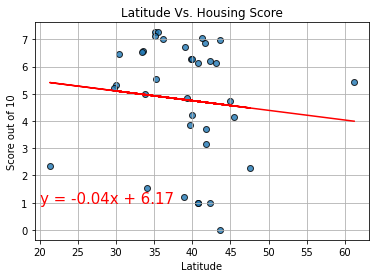

In [34]:
from scipy.stats import linregress
import seaborn as sns

#Store as x and y values
x_values = lat
y_values = housing

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values, alpha=0.8, edgecolor="black", linewidths=1)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,1),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Score out of 10')
plt.title('Latitude Vs. Housing Score')
plt.grid(True)
sns.set

# Print r square value
print(f"R squared: {rvalue**2}")

plt.savefig("LatVsHousing.png")

# Show plot
plt.show()

# Scatter Plot Longitude vs. Housing Scores

R squared: 0.025080679976480447


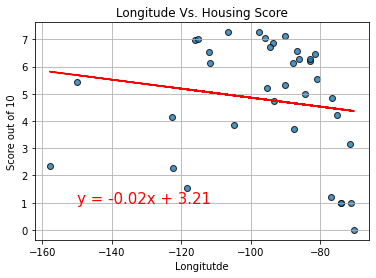

In [35]:
from scipy.stats import linregress
import seaborn as sns

#Store as x and y values
x_values = lon
y_values = housing

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values, alpha=0.8, edgecolor="black", linewidths=1)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-150,1),fontsize=15,color="red")

# Label plot
plt.xlabel('Longitutde')
plt.ylabel('Score out of 10')
plt.title('Longitude Vs. Housing Score')
plt.grid(True)
sns.set

# Print r square value
print(f"R squared: {rvalue**2}")

plt.savefig("LonVsHousing.png")

# Show plot
plt.show()

# Scatter Plot Latitude vs. Cost of Living Scores

R squared: 0.04349257799224935


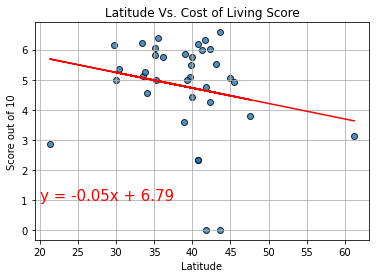

In [36]:
#Store as x and y values
x_values = lat
y_values = living

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values, alpha=0.8, edgecolor="black", linewidths=1)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,1),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Score out of 10')
plt.title('Latitude Vs. Cost of Living Score')
plt.grid(True)
sns.set

# Print r square value
print(f"R squared: {rvalue**2}")

plt.savefig("LatVsLiving.png")

# Show plot
plt.show()

# Scatter Plot Longitude vs. Cost of Living Scores

R squared: 0.027018836279562284


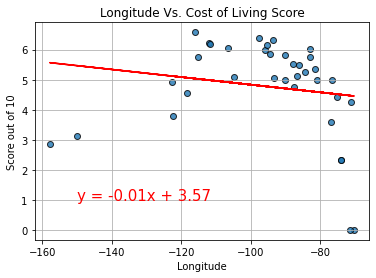

In [37]:
#Store as x and y values
x_values = lon
y_values = living

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values, alpha=0.8, edgecolor="black", linewidths=1)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-150,1),fontsize=15,color="red")

# Label plot
plt.xlabel('Longitude')
plt.ylabel('Score out of 10')
plt.title('Longitude Vs. Cost of Living Score')
plt.grid(True)
sns.set

# Print r square value
print(f"R squared: {rvalue**2}")

plt.savefig("LonVsLiving.png")

# Show plot
plt.show()

# Scatter Plot Latitude vs. Travel Connectivity Scores

R squared: 0.00043810006006456196


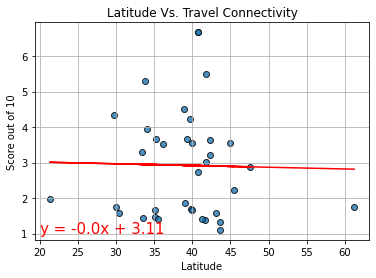

In [38]:
#Store as x and y values
x_values = lat
y_values = travel

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values, alpha=0.8, edgecolor="black", linewidths=1)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,1),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Score out of 10')
plt.title('Latitude Vs. Travel Connectivity')
plt.grid(True)
sns.set

# Print r square value
print(f"R squared: {rvalue**2}")

plt.savefig("LatVsTravel.png")

# Show plot
plt.show()

# Scatter Plot Longitude vs. Travel Connectivity Scores

R squared: 0.07475069754624185


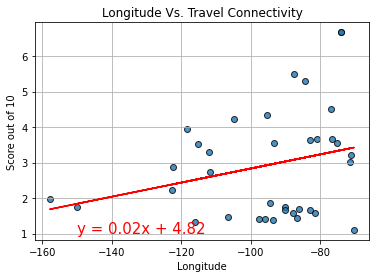

In [39]:
#Store as x and y values
x_values = lon
y_values = travel

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values, alpha=0.8, edgecolor="black", linewidths=1)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-150,1),fontsize=15,color="red")

# Label plot
plt.xlabel('Longitude')
plt.ylabel('Score out of 10')
plt.title('Longitude Vs. Travel Connectivity')
plt.grid(True)
sns.set

# Print r square value
print(f"R squared: {rvalue**2}")

plt.savefig("LonVsTravel.png")

# Show plot
plt.show()

# Scatter Plot Latitude vs. Commute Scores

R squared: 0.016728887798291212


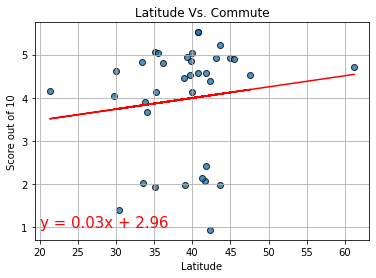

In [40]:
#Store as x and y values
x_values = lat
y_values = commute

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values, alpha=0.8, edgecolor="black", linewidths=1)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,1),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Score out of 10')
plt.title('Latitude Vs. Commute')
plt.grid(True)
sns.set

# Print r square value
print(f"R squared: {rvalue**2}")

plt.savefig("LatVsCommute.png")

# Show plot
plt.show()

# Scatter Plot Longitude vs. Commute Scores

R squared: 0.0515596503891089


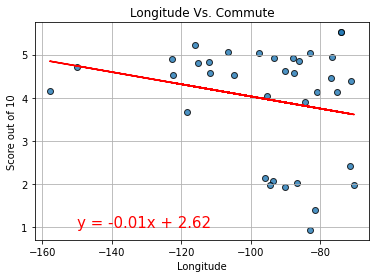

In [41]:
#Store as x and y values
x_values = lon
y_values = commute

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values, alpha=0.8, edgecolor="black", linewidths=1)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-150,1),fontsize=15,color="red")

# Label plot
plt.xlabel('Longitude')
plt.ylabel('Score out of 10')
plt.title('Longitude Vs. Commute')
plt.grid(True)
sns.set

# Print r square value
print(f"R squared: {rvalue**2}")

plt.savefig("LonVsCommute.png")

# Show plot
plt.show()

# Scatter Plot Latitude vs. Population Size

R squared: 0.006204019891388824


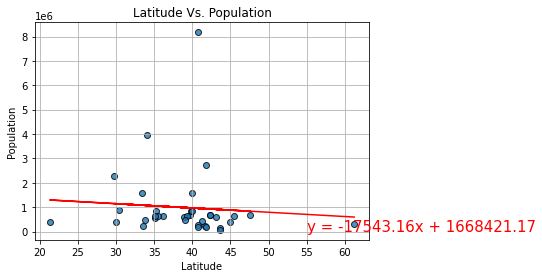

In [42]:
#Store as x and y values
x_values = lat
y_values = pop

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values, alpha=0.8, edgecolor="black", linewidths=1)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(55,6),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Population')
plt.title('Latitude Vs. Population')
plt.grid(True)
sns.set

# Print r square value
print(f"R squared: {rvalue**2}")

plt.savefig("LatVsPopulation.png")

# Show plot
plt.show()

# Scatter Plot Longitude vs. Population Size

R squared: 0.014273328561601913


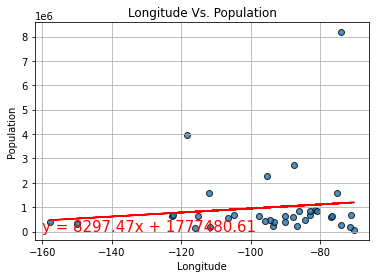

In [43]:
#Store as x and y values
x_values = lon
y_values = pop

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values, alpha=0.8, edgecolor="black", linewidths=1)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-160,6),fontsize=15,color="red")

# Label plot
plt.xlabel('Longitude')
plt.ylabel('Population')
plt.title('Longitude Vs. Population')
plt.grid(True)
sns.set

# Print r square value
print(f"R squared: {rvalue**2}")

plt.savefig("LonVsPopulation.png")

# Show plot
plt.show()

# Scatter Plot Latitude vs. Education Scores

R squared: 0.003885188845251327


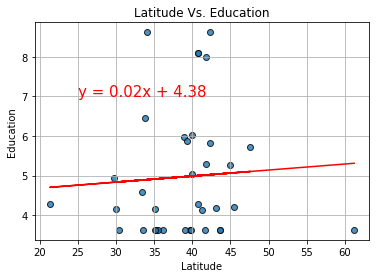

In [44]:
#Store as x and y values
x_values = lat
y_values = education

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values, alpha=0.8, edgecolor="black", linewidths=1)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(25,7),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Education')
plt.title('Latitude Vs. Education')
plt.grid(True)
sns.set

# Print r square value
print(f"R squared: {rvalue**2}")

plt.savefig("LatVsEducation.png")

# Show plot
plt.show()

# Scatter Plot Longitude vs. Education Scores

R squared: 0.08978809631708037


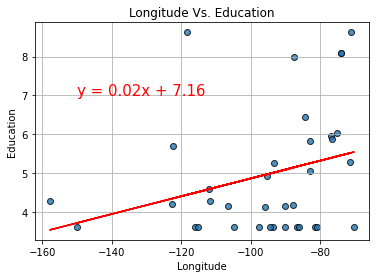

In [45]:
#Store as x and y values
x_values = lon
y_values = education

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values, alpha=0.8, edgecolor="black", linewidths=1)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-150,7),fontsize=15,color="red")

# Label plot
plt.xlabel('Longitude')
plt.ylabel('Education')
plt.title('Longitude Vs. Education')
plt.grid(True)
sns.set

# Print r square value
print(f"R squared: {rvalue**2}")

plt.savefig("LonVsEducation.png")

# Show plot
plt.show()

# Scatter Plot Latitude vs. Total Scores

R squared: 0.00803642656949017


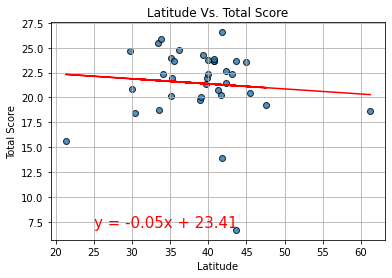

In [46]:
#Store as x and y values
x_values = lat
y_values = total

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values, alpha=0.8, edgecolor="black", linewidths=1)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(25,7),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Total Score')
plt.title('Latitude Vs. Total Score')
plt.grid(True)
sns.set

# Print r square value
print(f"R squared: {rvalue**2}")

plt.savefig("LatVsTotal.png")

# Show plot
plt.show()

# Scatter Plot Longitude vs. Total Scores

R squared: 1.043241371603495e-05


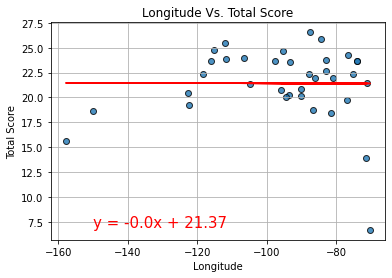

In [47]:
#Store as x and y values
x_values = lon
y_values = total

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values, alpha=0.8, edgecolor="black", linewidths=1)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-150,7),fontsize=15,color="red")

# Label plot
plt.xlabel('Longitude')
plt.ylabel('Total Score')
plt.title('Longitude Vs. Total Score')
plt.grid(True)
sns.set

# Print r square value
print(f"R squared: {rvalue**2}")

plt.savefig("LonVsTotal.png")

# Show plot
plt.show()

# Scatter Plot Population vs. Total Scores

R squared: 0.07559744668920104


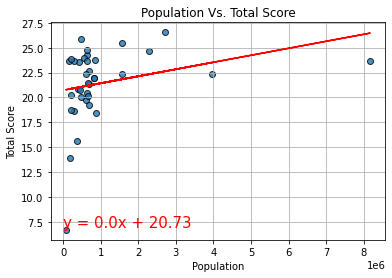

In [48]:
#Store as x and y values
x_values = pop
y_values = total

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values, alpha=0.8, edgecolor="black", linewidths=1)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-150,7),fontsize=15,color="red")

# Label plot
plt.xlabel('Population')
plt.ylabel('Total Score')
plt.title('Population Vs. Total Score')
plt.grid(True)
sns.set

# Print r square value
print(f"R squared: {rvalue**2}")

plt.savefig("PopVsTotal.png")

# Show plot
plt.show()

# Color Plot City Location vs. Housing Scores

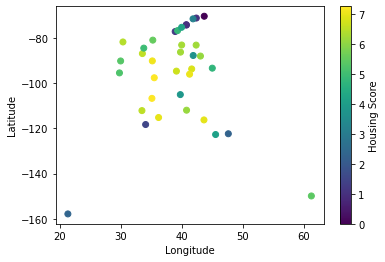

In [49]:
plt.scatter(lat,lon,c=housing)
clb = plt.colorbar()
plt.xlabel("Longitude")
plt.ylabel("Latitude")
clb.set_label("Housing Score")

plt.savefig("Housingcolorscore.png")
plt.show()

# Color Plot City Location vs. Living Scores

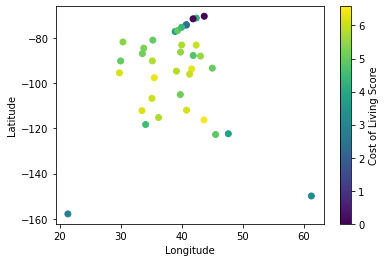

In [50]:
plt.scatter(lat,lon,c=living)
clb = plt.colorbar()
plt.xlabel("Longitude")
plt.ylabel("Latitude")
clb.set_label("Cost of Living Score")
plt.savefig("costcolorscore.png")
plt.show()

# Color Plot City Location vs. Travel Connectivity Scores

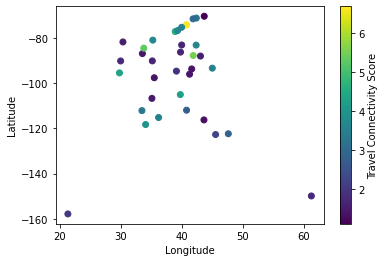

In [51]:
plt.scatter(lat,lon,c=travel)
clb = plt.colorbar()
plt.xlabel("Longitude")
plt.ylabel("Latitude")
clb.set_label("Travel Connectivity Score")
plt.savefig("travelcolorscore.png")
plt.show()

# Color Plot City Location vs. Commute Scores

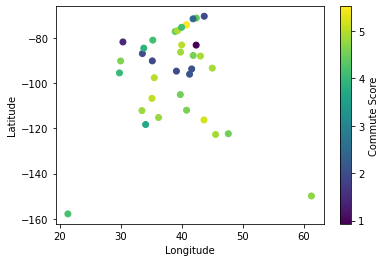

In [52]:
plt.scatter(lat,lon,c=commute)
clb = plt.colorbar()
plt.xlabel("Longitude")
plt.ylabel("Latitude")
clb.set_label("Commute Score")
plt.savefig("commutecolorscore.png")
plt.show()

# Color Plot City Location vs. Education Scores

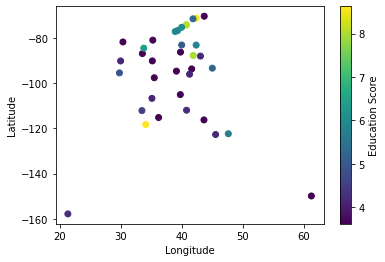

In [53]:
plt.scatter(lat,lon,c=education)
clb = plt.colorbar()
plt.xlabel("Longitude")
plt.ylabel("Latitude")
clb.set_label("Education Score")


# Show plot
plt.savefig("educationcolorscore.png")
plt.show()

# Color Plot City Location vs. Population Density

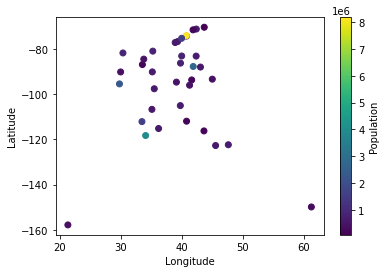

In [54]:
plt.scatter(lat,lon,c=pop)
clb = plt.colorbar()
plt.xlabel("Longitude")
plt.ylabel("Latitude")
clb.set_label("Population")


# Show plot
plt.savefig("populationdensity.png")
plt.show()

# Color Plot City Location vs. Total Scores

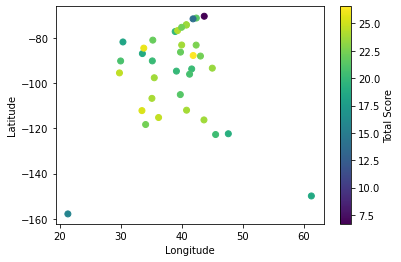

In [55]:
plt.scatter(lat,lon,c=total)
clb = plt.colorbar()
plt.xlabel("Longitude")
plt.ylabel("Latitude")
clb.set_label("Total Score")


# Show plot
plt.savefig("TotalQualityofLifeColorScore.png")
plt.show()

# Stacked Bar Graph of Total City Scores

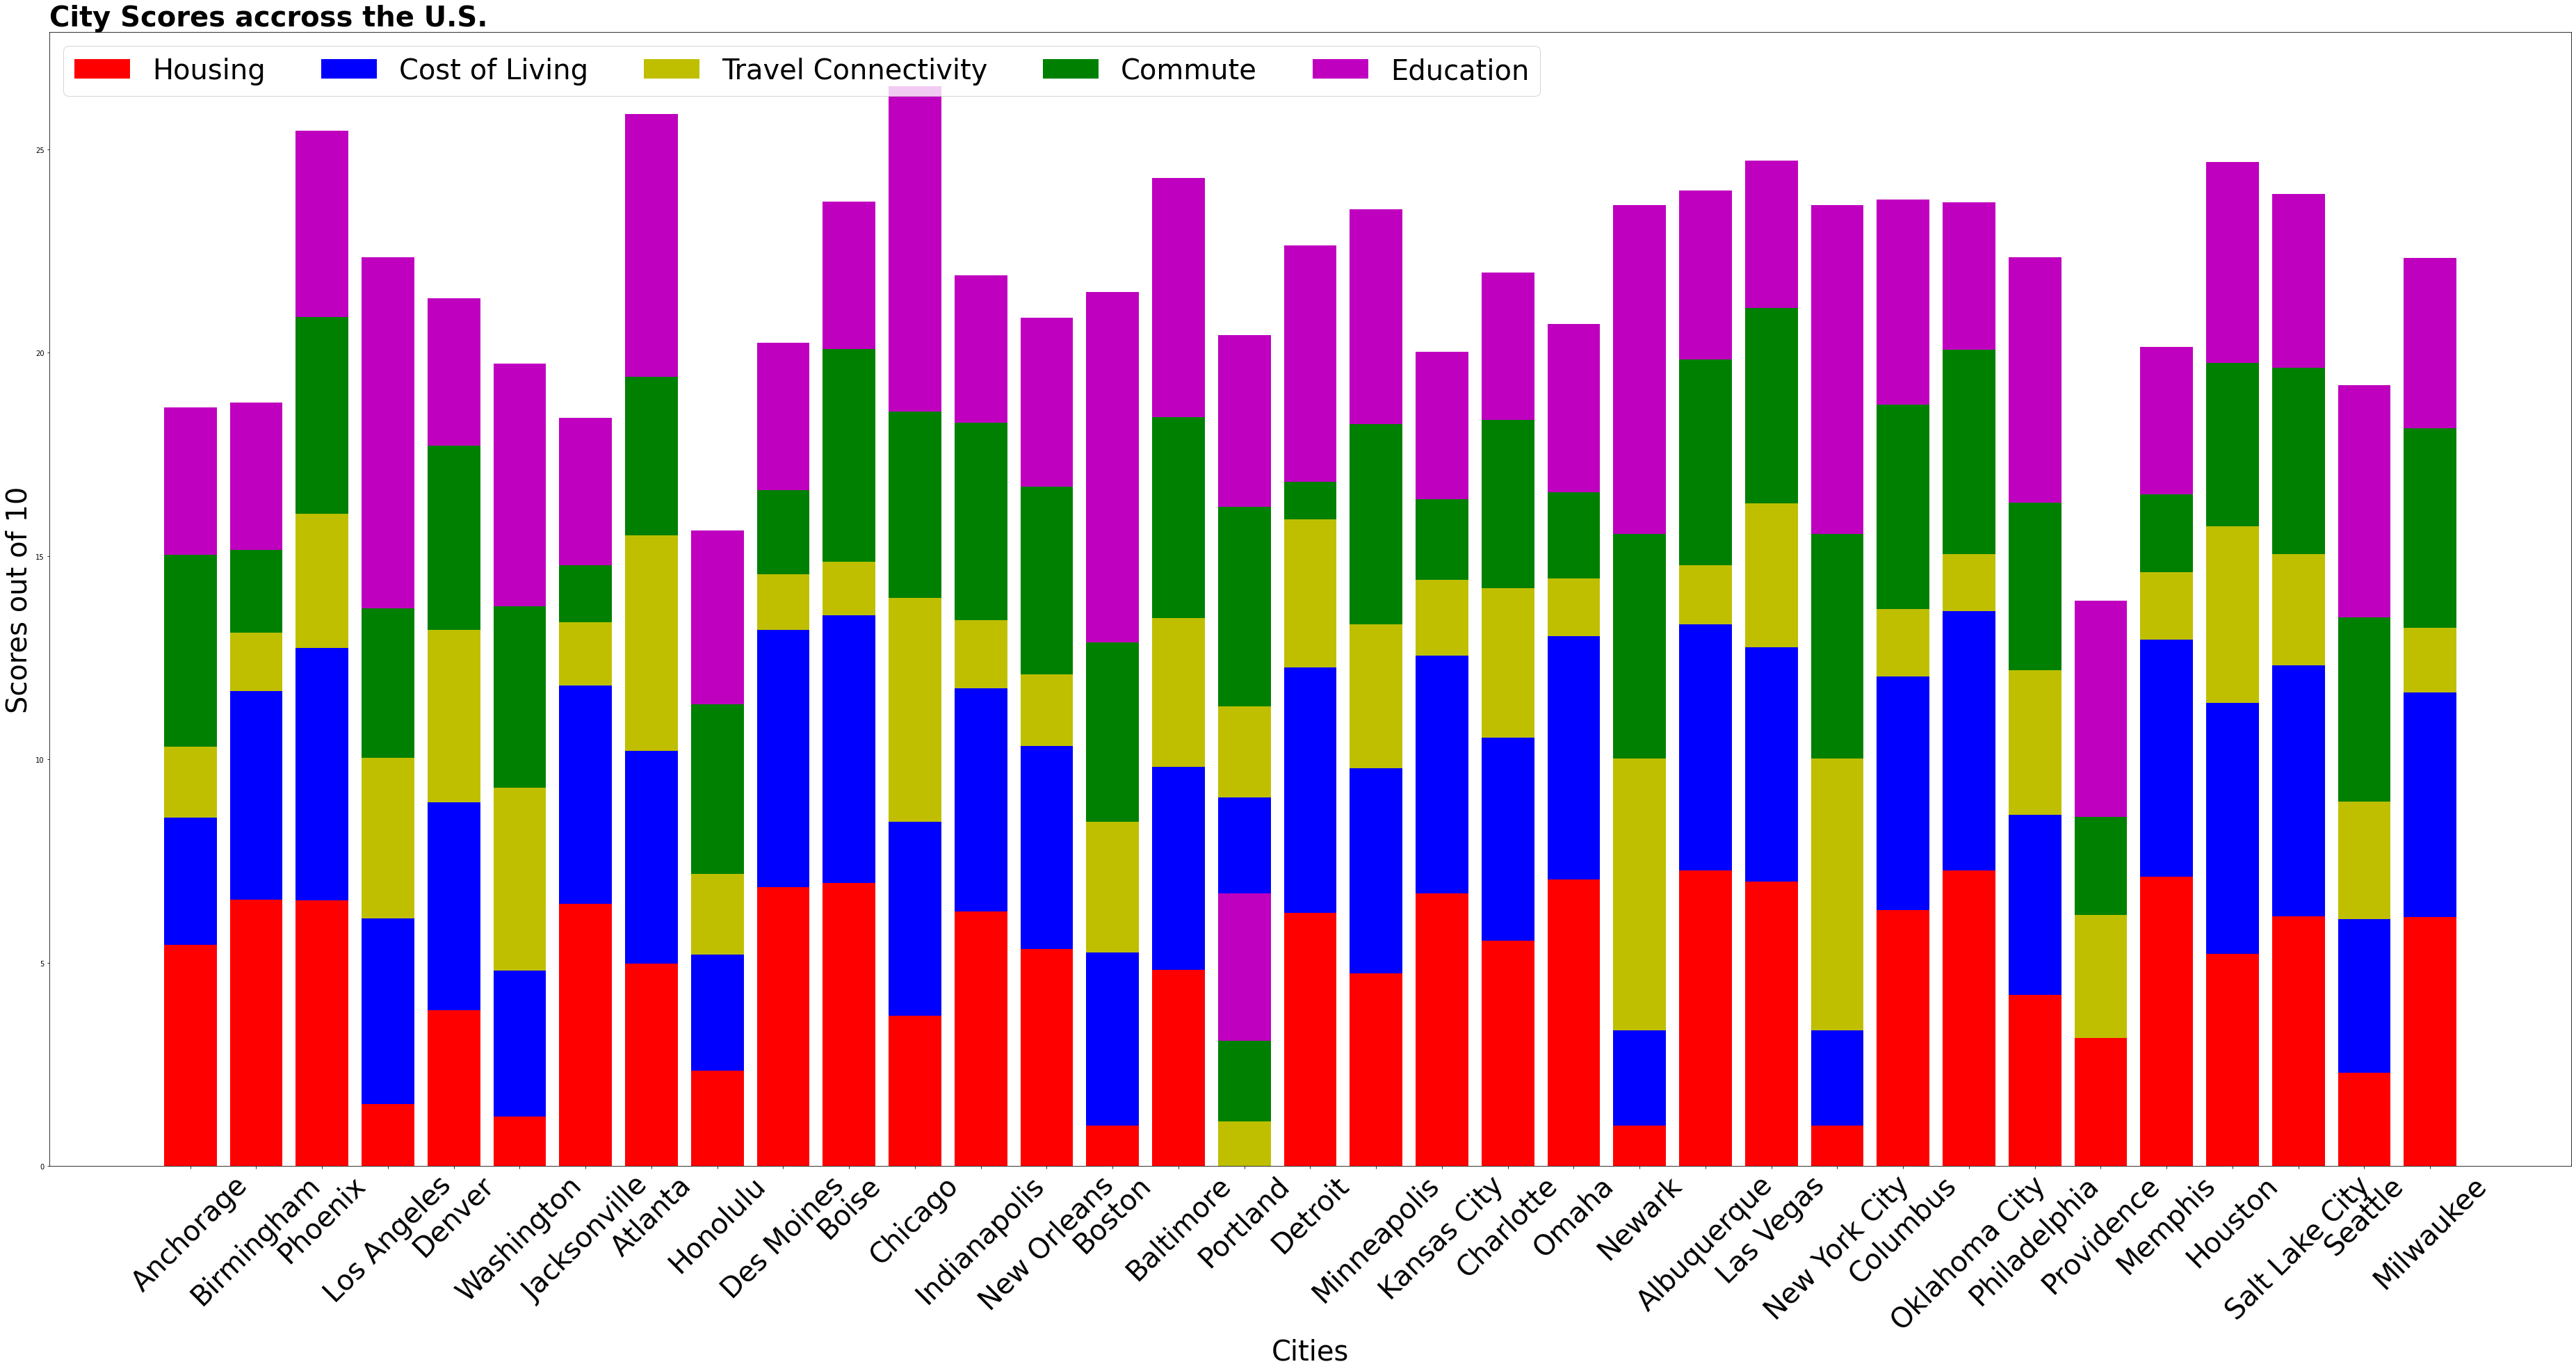

In [56]:
# importing package
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(1, figsize=(65, 30))
# create data
x = cities
y1 = np.array(housing)
y2 = np.array(living)
y3 = np.array(travel)
y4 = np.array(commute)
y5 = np.array(education)
  
# plot bars in stack manner
plt.bar(x, y1, color='r')
plt.bar(x, y2, bottom=y1, color='b')
plt.bar(x, y3, bottom=y1+y2, color='y')
plt.bar(x, y4, bottom=y1+y2+y3, color='g')
plt.bar(x, y5, bottom=y1+y2+y3+y4, color='m')
plt.xlabel("Cities", fontsize=40)
plt.ylabel("Scores out of 10", fontsize=40)
plt.legend(["Housing", "Cost of Living", "Travel Connectivity", "Commute", "Education"],loc='upper left', ncol = 5, fontsize=40)
plt.title("City Scores accross the U.S.", loc ='left', fontsize=40, weight='bold')
fig.align_labels()
plt.xticks(fontsize=40,rotation = 45) # Rotates X-Axis Ticks by 45-degrees

plt.savefig("CityScores.png")
plt.show()


# Bar Graph of All City Scores

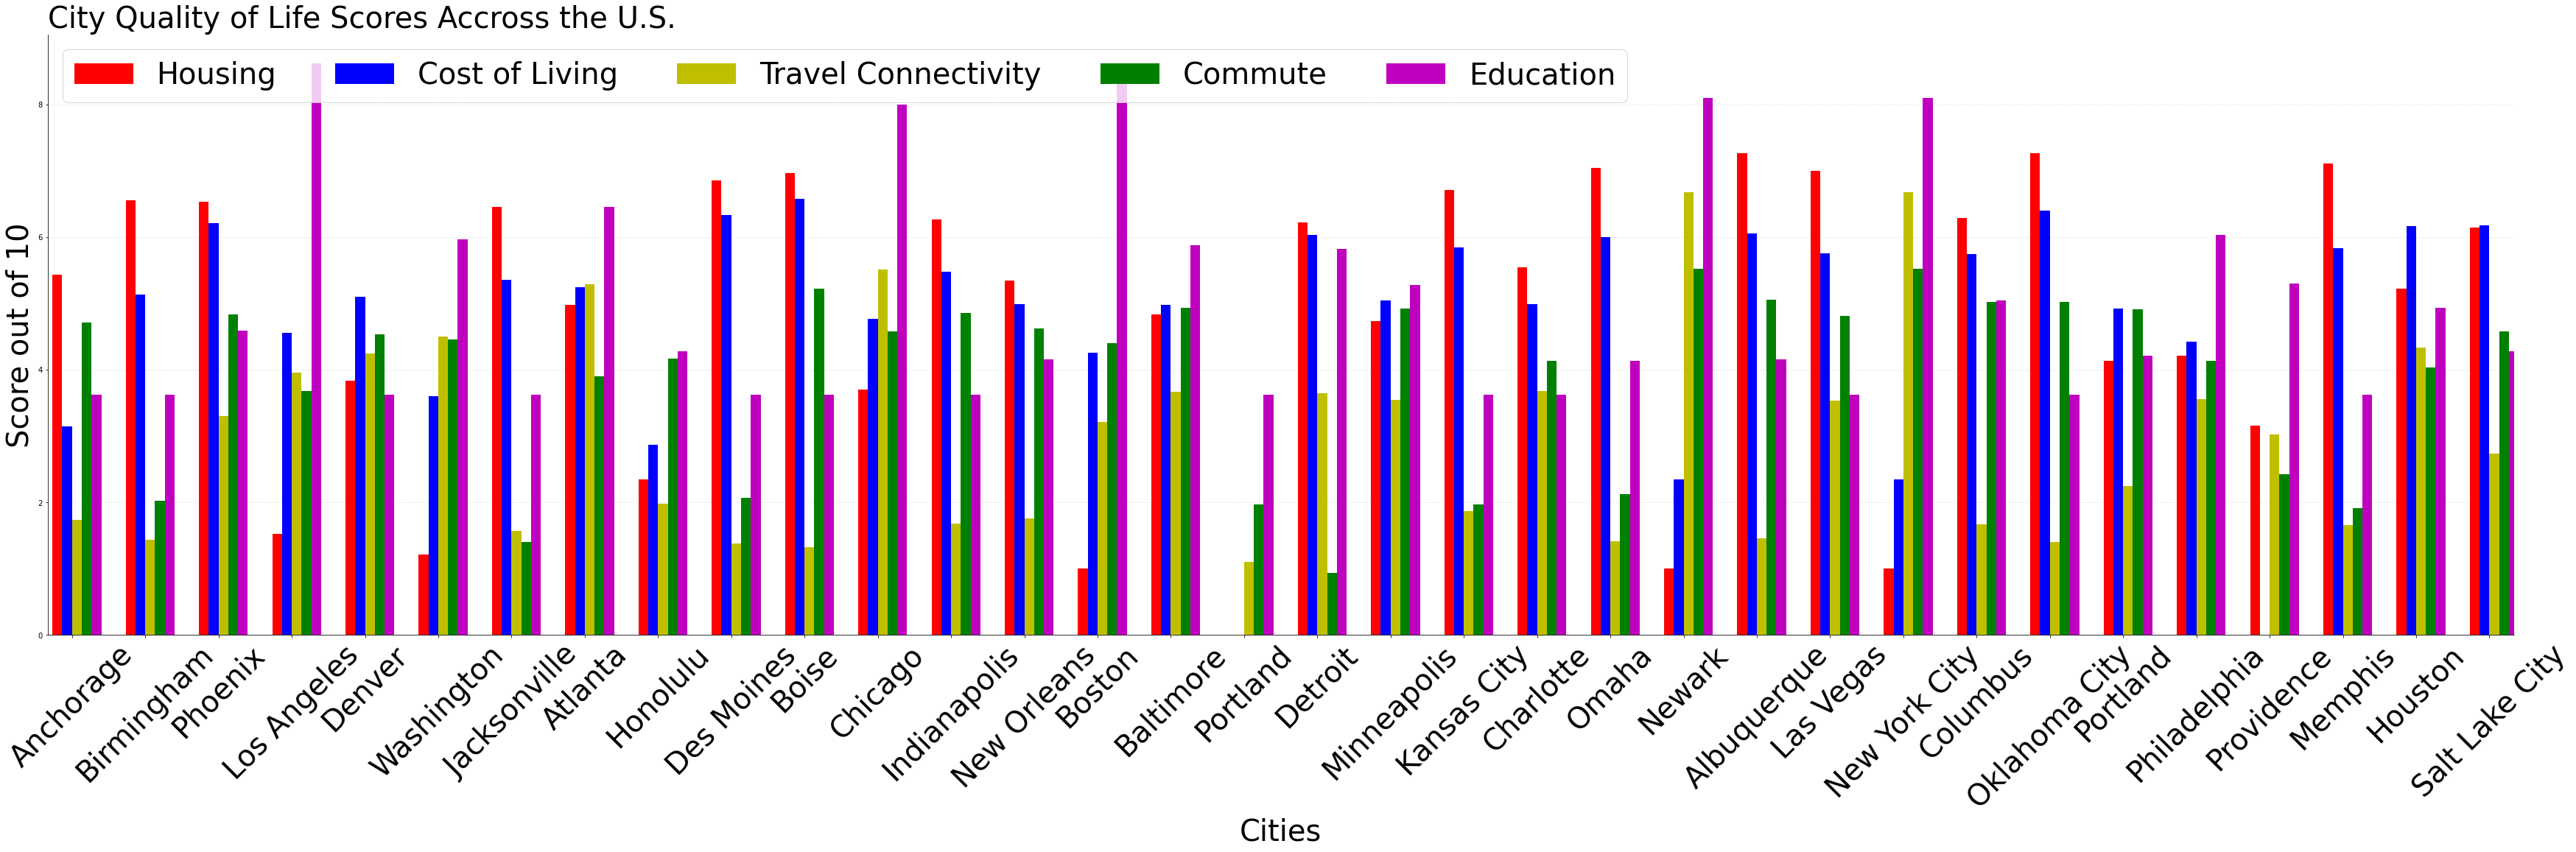

In [57]:
# define figure
fig, ax = plt.subplots(1, figsize=(60, 15))

# numerical x
x = np.arange(0, len(cities))*1.5

# plot bars
plt.bar(x - 0.3, housing, width = 0.2, color = 'r')
plt.bar(x - 0.1, living, width = 0.2, color = 'b')
plt.bar(x + 0.1, travel, width = 0.2, color = 'y')
plt.bar(x + 0.3, commute, width = 0.2, color = 'g')
plt.bar(x + 0.5, education, width = 0.2, color = 'm')

# remove spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# x y details
plt.ylabel('Score out of 10', fontsize=40)
plt.xlabel("Cities", fontsize=40)
plt.xticks(x, cities, rotation = 45, fontsize=40)
plt.xlim(-0.5, 50)

# grid lines
ax.set_axisbelow(True)
ax.yaxis.grid(color='gray', linestyle='dashed', alpha=0.2)

# title and legend
plt.title('City Quality of Life Scores Accross the U.S.', loc ='left', fontsize= 40)
plt.legend(['Housing', 'Cost of Living', 'Travel Connectivity', 'Commute', 'Education'], loc='upper left', ncol = 5, fontsize= 40)
plt.savefig("CityScores2.png")
fig.align_labels()

fig.align_labels()
plt.xticks(rotation = 45) # Rotates X-Axis Ticks by 45-degrees

plt.show()


In [58]:
#Create new df showing top 5 cities and bottom 5 cities in each score collumn

#Sort by collumn and keep only 5

sorted_top_housing = qol_df.sort_values(by = 'Housing', ascending = False, ignore_index=True)
top_5_housing=sorted_top_housing.head(5)
top_5_housing.to_csv("Top5inHousing.csv")
top_5_housing

City State Country  Population  Latitude   Longitude  Housing  \
0    Albuquerque    NM      US      559121  35.08449  -106.65114   7.2620   
1  Oklahoma City    OK      US      631346  35.46756   -97.51643   7.2610   
2        Memphis    TN      US      655770  35.14953   -90.04898   7.1145   
3          Omaha    NE      US      443885  41.25626   -95.94043   7.0405   
4      Las Vegas    NV      US      623747  36.17497  -115.13722   7.0010   

   Cost of Living  Travel Connectivity  Commute  Education  Total Score  
0           6.059               1.4555  5.05575     4.1520     23.98425  
1           6.394               1.3990  5.02725     3.6245     23.70575  
2           5.829               1.6615  1.91750     3.6245     20.14700  
3           5.994               1.4165  2.12775     4.1280     20.70675  
4           5.759               3.5285  4.80750     3.6245     24.72050

In [59]:
sorted_bottom_housing = qol_df.sort_values(by = 'Housing', ascending = True, ignore_index=True)
bottom_5_housing=sorted_bottom_housing.head(5)
bottom_5_housing.to_csv("Bottom5inHousing.csv")
bottom_5_housing

City State Country  Population  Latitude  Longitude  Housing  \
0       Portland    ME      US       66881  43.65737   -70.2589   0.0000   
1         Boston    MA      US      667137  42.35843  -71.05977   1.0000   
2         Newark    NJ      US      281944  40.73566  -74.17237   1.0000   
3  New York City    NY      US     8175133  40.71427  -74.00597   1.0000   
4     Washington    DC      US      601723  38.89511  -77.03637   1.2105   

   Cost of Living  Travel Connectivity  Commute  Education  Total Score  
0           0.000                1.102  1.97025     3.6245      6.69675  
1           4.259                3.215  4.39625     8.6245     21.49475  
2           2.342                6.675  5.51925     8.0935     23.62975  
3           2.342                6.675  5.51925     8.0935     23.62975  
4           3.595                4.505  4.45700     5.9685     19.73600

In [60]:
sorted_top_living = qol_df.sort_values(by = 'Cost of Living', ascending = False, ignore_index=True)
top_5_living=sorted_top_living.head(5)
top_5_living.to_csv("Top5inCostofLiving.csv")
top_5_living

City State Country  Population  Latitude   Longitude  Housing  \
0           Boise    ID      US      145987   43.6135  -116.20345   6.9635   
1   Oklahoma City    OK      US      631346  35.46756   -97.51643   7.2610   
2      Des Moines    IA      US      210330  41.60054   -93.60911   6.8510   
3         Phoenix    AZ      US     1563025  33.44838  -112.07404   6.5330   
4  Salt Lake City    UT      US      192672  40.76078  -111.89105   6.1410   

   Cost of Living  Travel Connectivity  Commute  Education  Total Score  
0           6.578               1.3235  5.22500     3.6245     23.71450  
1           6.394               1.3990  5.02725     3.6245     23.70575  
2           6.327               1.3790  2.07225     3.6245     20.25375  
3           6.208               3.3025  4.82850     4.5910     25.46300  
4           6.172               2.7370  4.57400     4.2805     23.90450

In [61]:
sorted_bottom_living = qol_df.sort_values(by = 'Cost of Living', ascending = True, ignore_index=True)
bottom_5_living=sorted_bottom_living.head(5)
bottom_5_living.to_csv("Bottom5inCostofLiving.csv")
bottom_5_living

City State Country  Population  Latitude   Longitude  Housing  \
0     Providence    RI      US      179207  41.82399   -71.41283   3.1530   
1       Portland    ME      US       66881  43.65737    -70.2589   0.0000   
2         Newark    NJ      US      281944  40.73566   -74.17237   1.0000   
3  New York City    NY      US     8175133  40.71427   -74.00597   1.0000   
4       Honolulu    HI      US      371657  21.30694  -157.85833   2.3415   

   Cost of Living  Travel Connectivity  Commute  Education  Total Score  
0           0.000               3.0185  2.42200     5.3015     13.89500  
1           0.000               1.1020  1.97025     3.6245      6.69675  
2           2.342               6.6750  5.51925     8.0935     23.62975  
3           2.342               6.6750  5.51925     8.0935     23.62975  
4           2.867               1.9830  4.16175     4.2805     15.63375

In [62]:
sorted_top_travel = qol_df.sort_values(by = 'Travel Connectivity', ascending = False, ignore_index=True)
top_5_travel=sorted_top_travel.head(5)
top_5_travel.to_csv("Top5inTravel.csv")
top_5_travel

City State Country  Population  Latitude  Longitude  Housing  \
0         Newark    NJ      US      281944  40.73566  -74.17237   1.0000   
1  New York City    NY      US     8175133  40.71427  -74.00597   1.0000   
2        Chicago    IL      US     2720546  41.85003  -87.65005   3.7020   
3        Atlanta    GA      US      463878    33.749  -84.38798   4.9755   
4     Washington    DC      US      601723  38.89511  -77.03637   1.2105   

   Cost of Living  Travel Connectivity  Commute  Education  Total Score  
0           2.342               6.6750  5.51925     8.0935     23.62975  
1           2.342               6.6750  5.51925     8.0935     23.62975  
2           4.766               5.5075  4.57975     7.9990     26.55425  
3           5.241               5.2915  3.89775     6.4570     25.86275  
4           3.595               4.5050  4.45700     5.9685     19.73600

In [63]:
sorted_bottom_travel = qol_df.sort_values(by = 'Travel Connectivity', ascending = True, ignore_index=True)
bottom_5_travel=sorted_bottom_travel.head(5)
bottom_5_travel.to_csv("Bottom5inTravel.csv")
bottom_5_travel

City State Country  Population  Latitude   Longitude  Housing  \
0       Portland    ME      US       66881  43.65737    -70.2589   0.0000   
1          Boise    ID      US      145987   43.6135  -116.20345   6.9635   
2     Des Moines    IA      US      210330  41.60054   -93.60911   6.8510   
3  Oklahoma City    OK      US      631346  35.46756   -97.51643   7.2610   
4          Omaha    NE      US      443885  41.25626   -95.94043   7.0405   

   Cost of Living  Travel Connectivity  Commute  Education  Total Score  
0           0.000               1.1020  1.97025     3.6245      6.69675  
1           6.578               1.3235  5.22500     3.6245     23.71450  
2           6.327               1.3790  2.07225     3.6245     20.25375  
3           6.394               1.3990  5.02725     3.6245     23.70575  
4           5.994               1.4165  2.12775     4.1280     20.70675

In [64]:
sorted_top_commute = qol_df.sort_values(by = 'Commute', ascending = False, ignore_index=True)
top_5_commute=sorted_top_commute.head(5)
top_5_commute.to_csv("Top5inCommute.csv")
top_5_commute

City State Country  Population  Latitude   Longitude  Housing  \
0  New York City    NY      US     8175133  40.71427   -74.00597   1.0000   
1         Newark    NJ      US      281944  40.73566   -74.17237   1.0000   
2          Boise    ID      US      145987   43.6135  -116.20345   6.9635   
3    Albuquerque    NM      US      559121  35.08449  -106.65114   7.2620   
4  Oklahoma City    OK      US      631346  35.46756   -97.51643   7.2610   

   Cost of Living  Travel Connectivity  Commute  Education  Total Score  
0           2.342               6.6750  5.51925     8.0935     23.62975  
1           2.342               6.6750  5.51925     8.0935     23.62975  
2           6.578               1.3235  5.22500     3.6245     23.71450  
3           6.059               1.4555  5.05575     4.1520     23.98425  
4           6.394               1.3990  5.02725     3.6245     23.70575

In [65]:
sorted_bottom_commute = qol_df.sort_values(by = 'Commute', ascending = True, ignore_index=True)
bottom_5_commute=sorted_bottom_commute.head(5)
bottom_5_commute.to_csv("Bottom5inCommute.csv")
bottom_5_commute

City State Country  Population  Latitude  Longitude  Housing  \
0       Detroit    MI      US      677116  42.33143  -83.04575   6.2230   
1  Jacksonville    FL      US      868031  30.33218  -81.65565   6.4500   
2       Memphis    TN      US      655770  35.14953  -90.04898   7.1145   
3      Portland    ME      US       66881  43.65737   -70.2589   0.0000   
4   Kansas City    MO      US      475378  39.09973  -94.57857   6.7075   

   Cost of Living  Travel Connectivity  Commute  Education  Total Score  
0           6.032               3.6405  0.93300     5.8185     22.64700  
1           5.359               1.5675  1.40575     3.6245     18.40675  
2           5.829               1.6615  1.91750     3.6245     20.14700  
3           0.000               1.1020  1.97025     3.6245      6.69675  
4           5.844               1.8690  1.97250     3.6245     20.01750

In [66]:
sorted_top_education = qol_df.sort_values(by = 'Education', ascending = False, ignore_index=True)
top_5_education=sorted_top_education.head(5)
top_5_education.to_csv("Top5inEducation.csv")
top_5_education

City State Country  Population  Latitude   Longitude  Housing  \
0    Los Angeles    CA      US     3971883  34.05223  -118.24368   1.5275   
1         Boston    MA      US      667137  42.35843   -71.05977   1.0000   
2  New York City    NY      US     8175133  40.71427   -74.00597   1.0000   
3         Newark    NJ      US      281944  40.73566   -74.17237   1.0000   
4        Chicago    IL      US     2720546  41.85003   -87.65005   3.7020   

   Cost of Living  Travel Connectivity  Commute  Education  Total Score  
0           4.556               3.9585  3.67700     8.6245     22.34350  
1           4.259               3.2150  4.39625     8.6245     21.49475  
2           2.342               6.6750  5.51925     8.0935     23.62975  
3           2.342               6.6750  5.51925     8.0935     23.62975  
4           4.766               5.5075  4.57975     7.9990     26.55425

In [67]:
sorted_bottom_education = qol_df.sort_values(by = 'Education', ascending = True, ignore_index=True)
bottom_5_education=sorted_bottom_education.head(5)
bottom_5_education.to_csv("Bottom5inEducation.csv")
bottom_5_education

City State Country  Population  Latitude   Longitude  Housing  \
0      Anchorage    AK      US      298695  61.21806  -149.90028   5.4335   
1     Birmingham    AL      US      212461  33.52066   -86.80249   6.5555   
2        Memphis    TN      US      655770  35.14953   -90.04898   7.1145   
3  Oklahoma City    OK      US      631346  35.46756   -97.51643   7.2610   
4         Denver    CO      US      682545  39.73915   -104.9847   3.8375   

   Cost of Living  Travel Connectivity  Commute  Education  Total Score  
0           3.141               1.7380  4.71525     3.6245     18.65225  
1           5.133               1.4355  2.02075     3.6245     18.76925  
2           5.829               1.6615  1.91750     3.6245     20.14700  
3           6.394               1.3990  5.02725     3.6245     23.70575  
4           5.102               4.2430  4.53000     3.6245     21.33700

# Statistical Graphs of All Relational Data

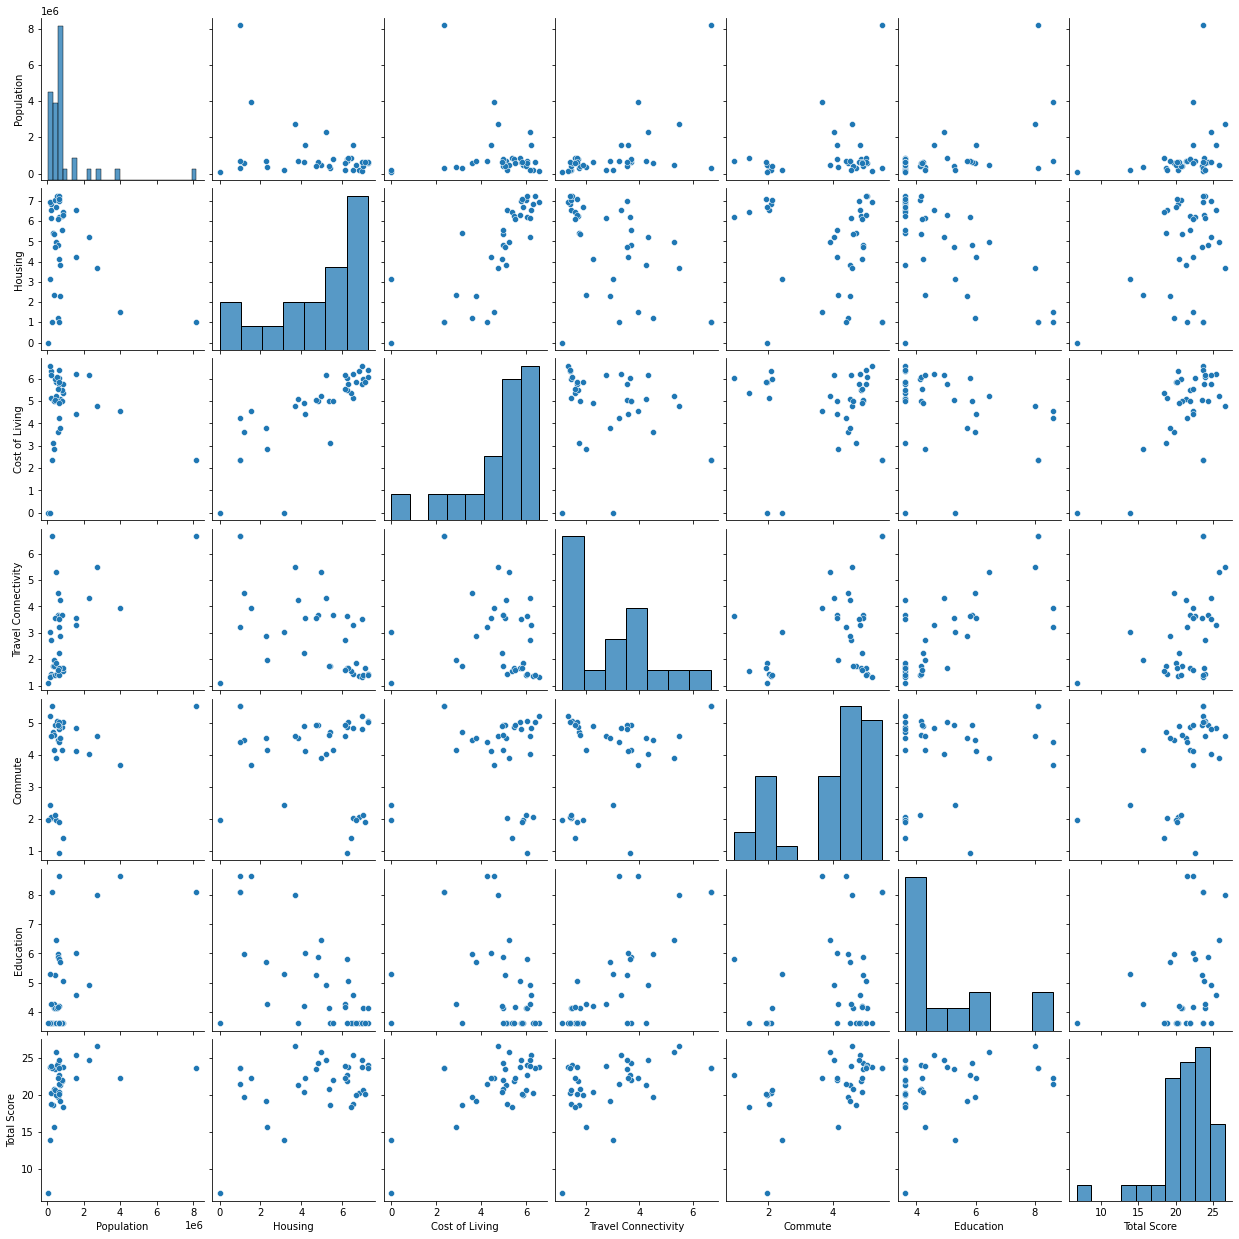

<Figure size 800x800 with 0 Axes>

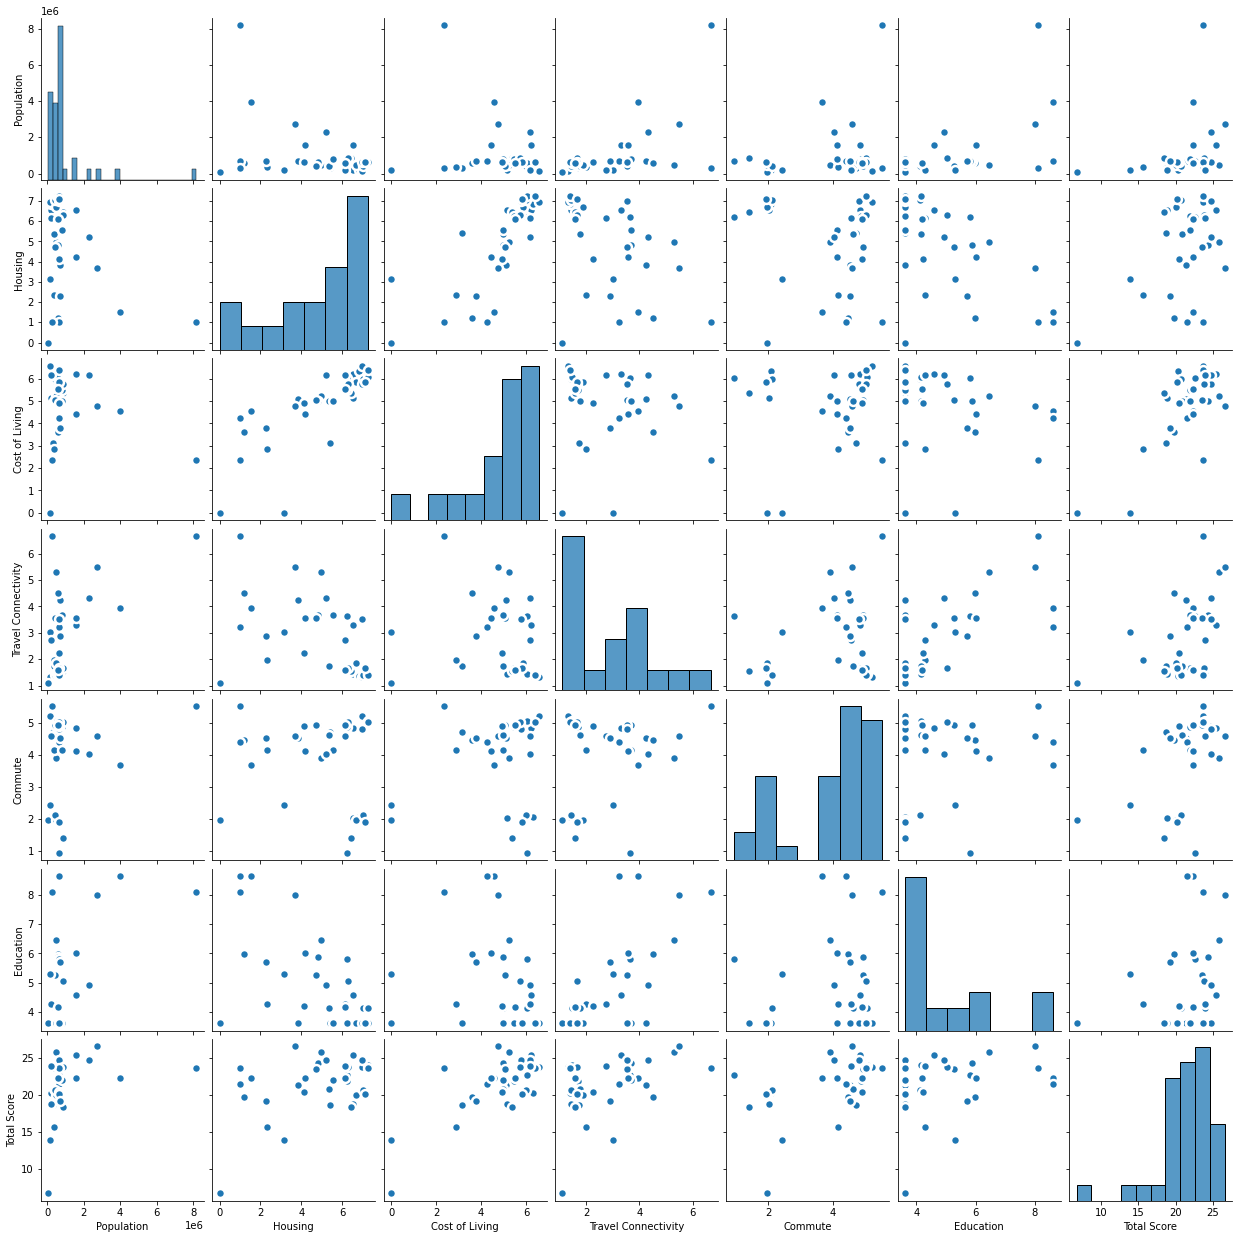

In [68]:
import seaborn as sns

sns.pairplot(qol_df)

# Plot
plt.figure(figsize=(10,10), dpi= 80)
sns.pairplot(qol_df, kind="scatter", plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))
plt.savefig("Pairplot.png")
plt.show()

# Correlation Coefficient Correlation Graphs of All Relational Data

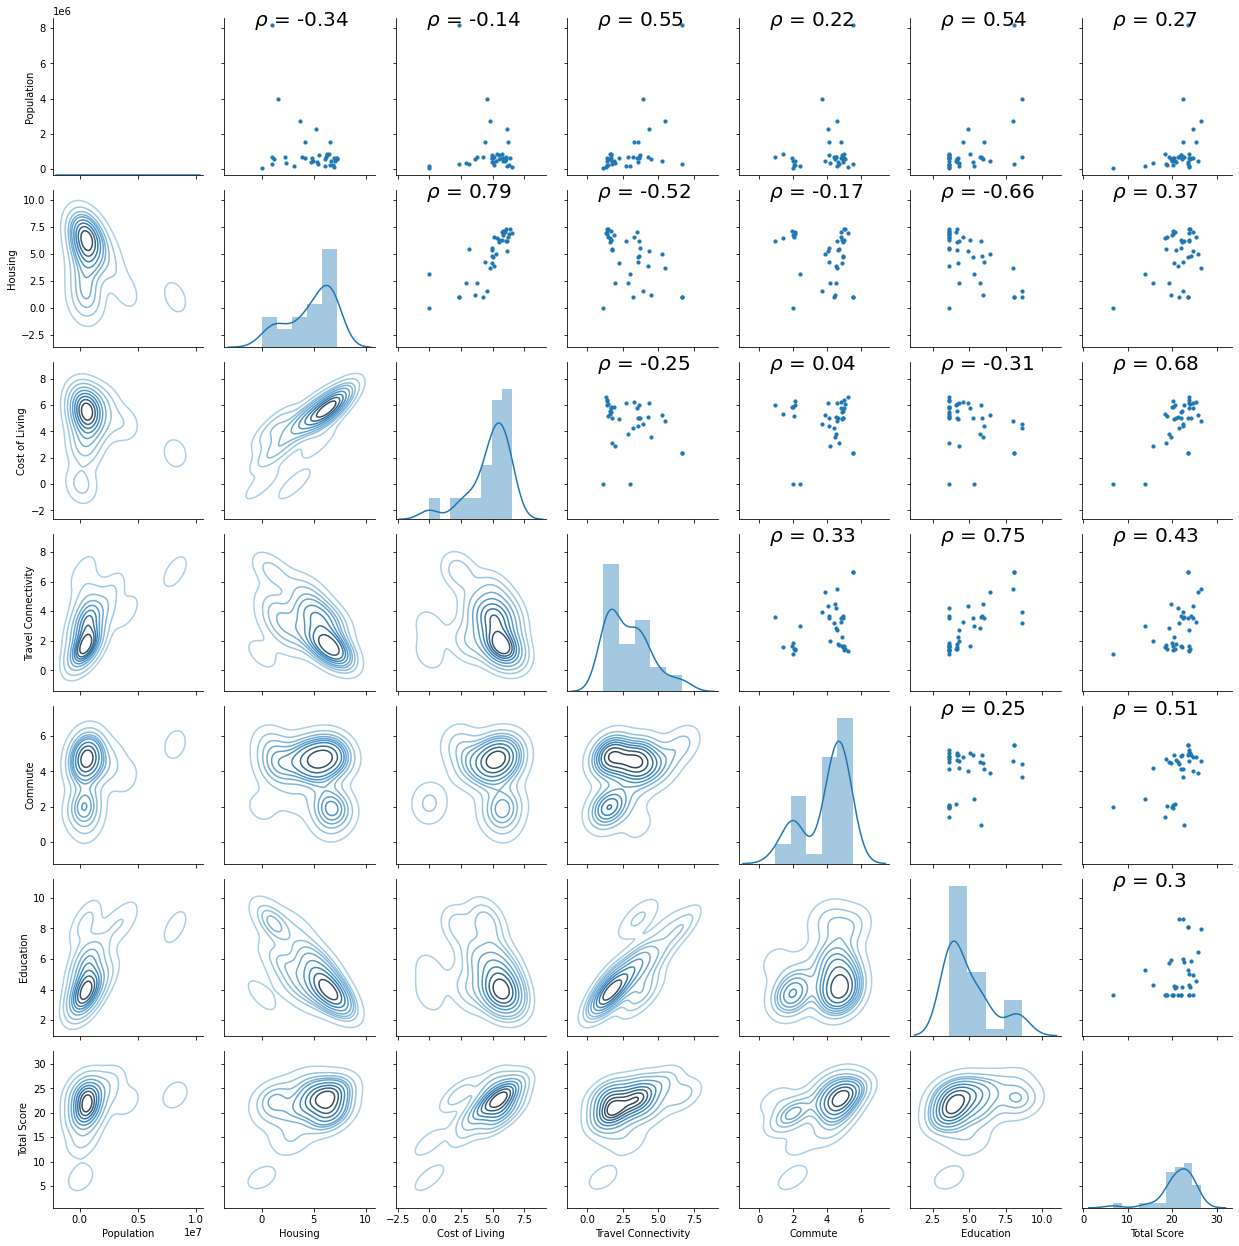

In [69]:
# Function to calculate correlation coefficient between two arrays
def corr(x, y, **kwargs):
    
    # Calculate the value
    coef = np.corrcoef(x, y)[0][1]
    # Make the label
    label = r'$\rho$ = ' + str(round(coef, 2))
    
    # Add the label to the plot
    ax = plt.gca()
    ax.annotate(label, xy = (0.2, 0.95), size = 20, xycoords = ax.transAxes)
    

# Map the plots to the locations
g = sns.PairGrid(qol_df, palette=["red"])
g.map_upper(plt.scatter, s=10)
g.map_upper(corr)
g.map_diag(sns.distplot, kde=True)
g.map_lower(sns.kdeplot, cmap="Blues_d")
plt.savefig("PearsonRGrid.png")

# Correlogram of Quality of Life Scores

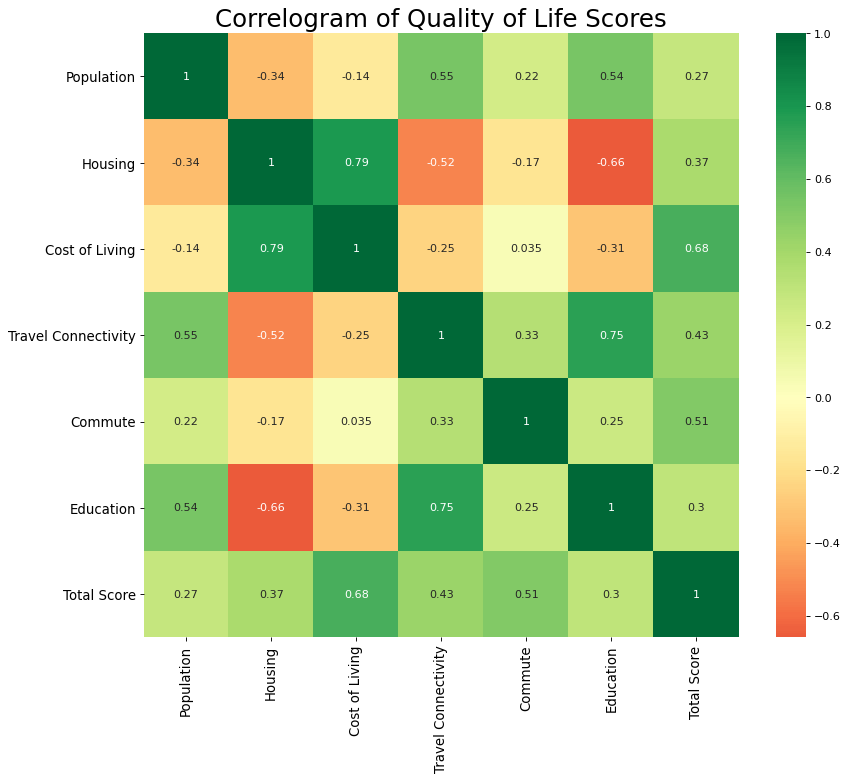

In [70]:
# Plot
plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(qol_df.corr(), xticklabels=qol_df.corr().columns, yticklabels=qol_df.corr().columns, cmap='RdYlGn', center=0, annot=True)

# Decorations
plt.title('Correlogram of Quality of Life Scores', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig("CorrelogramScores.png")
plt.show()

In [71]:
#Sort Total Scores to find top 5 and bottom 5 rated cities

sorted_top_total = qol_df.sort_values(by = 'Total Score', ascending = False, ignore_index=True)
top_5_total=sorted_top_living.head(5)
top_5_total.to_csv("Top5CitiesTotalScore.csv")
top_5_total

City State Country  Population  Latitude   Longitude  Housing  \
0           Boise    ID      US      145987   43.6135  -116.20345   6.9635   
1   Oklahoma City    OK      US      631346  35.46756   -97.51643   7.2610   
2      Des Moines    IA      US      210330  41.60054   -93.60911   6.8510   
3         Phoenix    AZ      US     1563025  33.44838  -112.07404   6.5330   
4  Salt Lake City    UT      US      192672  40.76078  -111.89105   6.1410   

   Cost of Living  Travel Connectivity  Commute  Education  Total Score  
0           6.578               1.3235  5.22500     3.6245     23.71450  
1           6.394               1.3990  5.02725     3.6245     23.70575  
2           6.327               1.3790  2.07225     3.6245     20.25375  
3           6.208               3.3025  4.82850     4.5910     25.46300  
4           6.172               2.7370  4.57400     4.2805     23.90450

In [72]:
sorted_bottom_total = qol_df.sort_values(by = 'Total Score', ascending = True, ignore_index=True)
bottom_5_total=sorted_bottom_total.head(5)
bottom_5_total.to_csv("Bottom5CitiesTotalScore.csv")
bottom_5_total

City State Country  Population  Latitude   Longitude  Housing  \
0      Portland    ME      US       66881  43.65737    -70.2589   0.0000   
1    Providence    RI      US      179207  41.82399   -71.41283   3.1530   
2      Honolulu    HI      US      371657  21.30694  -157.85833   2.3415   
3  Jacksonville    FL      US      868031  30.33218   -81.65565   6.4500   
4     Anchorage    AK      US      298695  61.21806  -149.90028   5.4335   

   Cost of Living  Travel Connectivity  Commute  Education  Total Score  
0           0.000               1.1020  1.97025     3.6245      6.69675  
1           0.000               3.0185  2.42200     5.3015     13.89500  
2           2.867               1.9830  4.16175     4.2805     15.63375  
3           5.359               1.5675  1.40575     3.6245     18.40675  
4           3.141               1.7380  4.71525     3.6245     18.65225

In [73]:
topvsbottom=top_5_total.append(bottom_5_total)
topvsbottom.reset_index()

index            City State Country  Population  Latitude   Longitude  \
0      0           Boise    ID      US      145987   43.6135  -116.20345   
1      1   Oklahoma City    OK      US      631346  35.46756   -97.51643   
2      2      Des Moines    IA      US      210330  41.60054   -93.60911   
3      3         Phoenix    AZ      US     1563025  33.44838  -112.07404   
4      4  Salt Lake City    UT      US      192672  40.76078  -111.89105   
5      0        Portland    ME      US       66881  43.65737    -70.2589   
6      1      Providence    RI      US      179207  41.82399   -71.41283   
7      2        Honolulu    HI      US      371657  21.30694  -157.85833   
8      3    Jacksonville    FL      US      868031  30.33218   -81.65565   
9      4       Anchorage    AK      US      298695  61.21806  -149.90028   

   Housing  Cost of Living  Travel Connectivity  Commute  Education  \
0   6.9635           6.578               1.3235  5.22500     3.6245   
1   7.2610           6.394               1.3990  5.02725     3.6245   
2   6.8510           6.327               1.3790  2.07225     3.6245   
3   6.5330           6.208               3.3025  4.82850     4.5910   
4   6.1410           6.172               2.7370  4.57400     4.2805   
5   0.0000           0.000               1.1020  1.97025     3.6245   
6   3.1530           0.000               3.0185  2.42200     5.3015   
7   2.3415           2.867               1.9830  4.16175     4.2805   
8   6.4500           5.359               1.5675  1.40575     3.6245   
9   5.4335           3.141               1.7380  4.71525     3.6245   

   Total Score  
0     23.71450  
1     23.70575  
2     20.25375  
3     25.46300  
4     23.90450  
5      6.69675  
6     13.89500  
7     15.63375  
8     18.40675  
9     18.65225

# Stacked Bar Graph of Top 5 Rated Cities and Scores

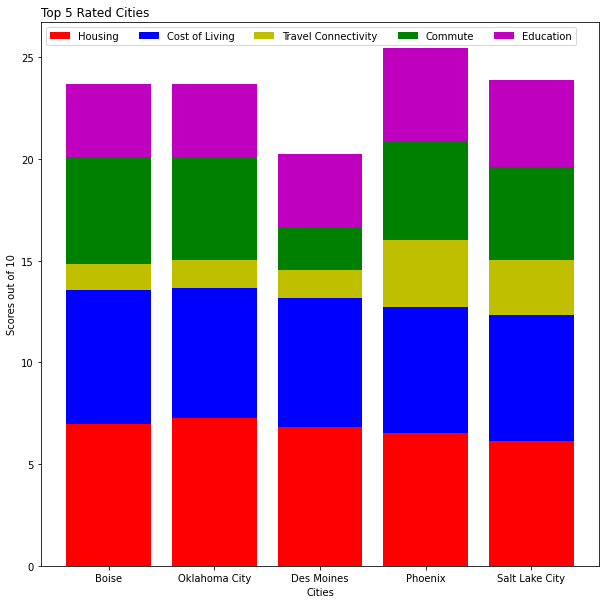

In [74]:

fig, ax = plt.subplots(1, figsize=(10, 10))
# create data
x = top_5_total['City']
y1 = top_5_total['Housing']
y2 = top_5_total['Cost of Living']
y3 = top_5_total['Travel Connectivity']
y4 = top_5_total['Commute']
y5 = top_5_total['Education']
  
# plot bars in stack manner
plt.bar(x, y1, color='r')
plt.bar(x, y2, bottom=y1, color='b')
plt.bar(x, y3, bottom=y1+y2, color='y')
plt.bar(x, y4, bottom=y1+y2+y3, color='g')
plt.bar(x, y5, bottom=y1+y2+y3+y4, color='m')
plt.xlabel("Cities")
plt.ylabel("Scores out of 10")
plt.legend(["Housing", "Cost of Living", "Travel Connectivity", "Commute", "Education"],loc='upper left', ncol = 5)
plt.title("Top 5 Rated Cities", loc ='left')
fig.align_labels()
plt.savefig("Top5CityScores.png")
plt.show()


# Stacked Bar Graph of Bottom 5 Rated Cities and Scores

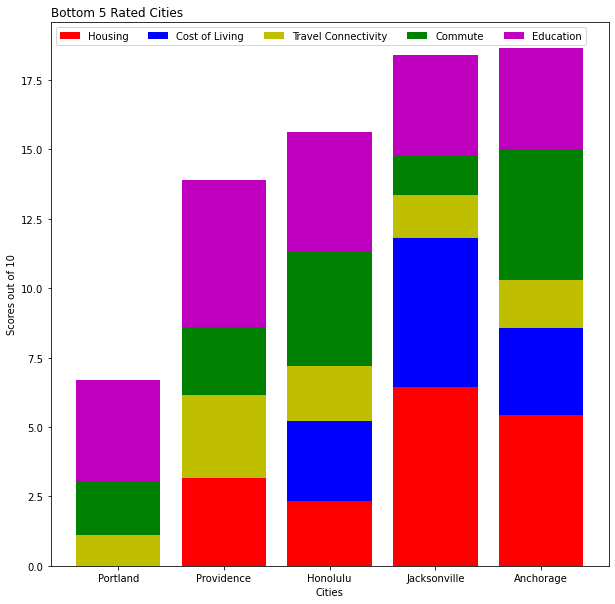

In [75]:

fig, ax = plt.subplots(1, figsize=(10, 10))
# create data
x = bottom_5_total['City']
y1 = bottom_5_total['Housing']
y2 = bottom_5_total['Cost of Living']
y3 = bottom_5_total['Travel Connectivity']
y4 = bottom_5_total['Commute']
y5 = bottom_5_total['Education']
  
# plot bars in stack manner
plt.bar(x, y1, color='r')
plt.bar(x, y2, bottom=y1, color='b')
plt.bar(x, y3, bottom=y1+y2, color='y')
plt.bar(x, y4, bottom=y1+y2+y3, color='g')
plt.bar(x, y5, bottom=y1+y2+y3+y4, color='m')
plt.xlabel("Cities")
plt.ylabel("Scores out of 10")
plt.legend(["Housing", "Cost of Living", "Travel Connectivity", "Commute", "Education"],loc='upper left', ncol = 5)
plt.title("Bottom 5 Rated Cities", loc ='left')
fig.align_labels()
plt.savefig("Bottom5CityScores.png")
plt.show()


In [76]:
# Stacked Bar Graph of Top 5 vs Bottom 5 Rated Cities and Scores

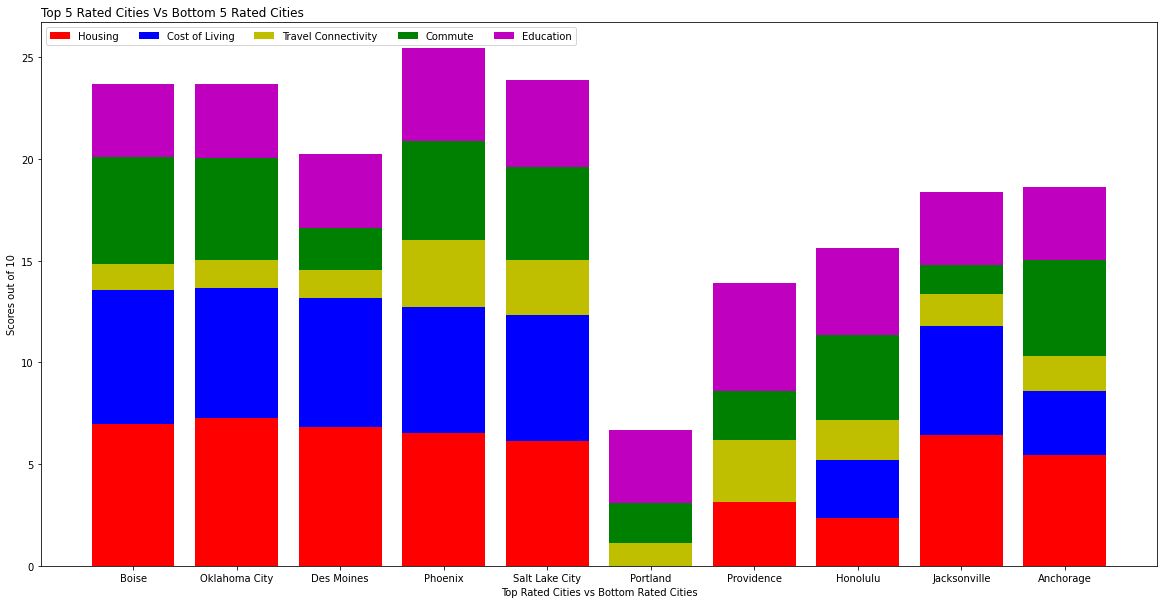

In [77]:
fig, ax = plt.subplots(1, figsize=(20,10))
# create data
x = topvsbottom['City']
y1 = topvsbottom['Housing']
y2 = topvsbottom['Cost of Living']
y3 = topvsbottom['Travel Connectivity']
y4 = topvsbottom['Commute']
y5 = topvsbottom['Education']
  
# plot bars in stack manner
plt.bar(x, y1, color='r')
plt.bar(x, y2, bottom=y1, color='b')
plt.bar(x, y3, bottom=y1+y2, color='y')
plt.bar(x, y4, bottom=y1+y2+y3, color='g')
plt.bar(x, y5, bottom=y1+y2+y3+y4, color='m')
plt.xlabel("Top Rated Cities vs Bottom Rated Cities")
plt.ylabel("Scores out of 10")
plt.legend(["Housing", "Cost of Living", "Travel Connectivity", "Commute", "Education"],loc='upper left', ncol = 5)
plt.title("Top 5 Rated Cities Vs Bottom 5 Rated Cities", loc ='left')
fig.align_labels()
plt.savefig("TopvsBottom5CityScores.png")
plt.show()


In [78]:

#Clean the missing data

nan_value = float("NaN")
lgst_cities.replace("", nan_value, inplace=True)

lgst_cities.dropna(inplace=True)
#not using economy score

lgst_cities


City State Country  Population  Latitude   Longitude  Housing  \
0        Anchorage    AK      US      298695  61.21806  -149.90028   5.4335   
1       Birmingham    AL      US      212461  33.52066   -86.80249   6.5555   
3          Phoenix    AZ      US     1563025  33.44838  -112.07404   6.5330   
4      Los Angeles    CA      US     3971883  34.05223  -118.24368   1.5275   
5           Denver    CO      US      682545  39.73915   -104.9847   3.8375   
7       Washington    DC      US      601723  38.89511   -77.03637   1.2105   
9     Jacksonville    FL      US      868031  30.33218   -81.65565   6.4500   
10         Atlanta    GA      US      463878    33.749   -84.38798   4.9755   
11        Honolulu    HI      US      371657  21.30694  -157.85833   2.3415   
12      Des Moines    IA      US      210330  41.60054   -93.60911   6.8510   
13           Boise    ID      US      145987   43.6135  -116.20345   6.9635   
14         Chicago    IL      US     2720546  41.85003   -87.65005   3.7020   
15    Indianapolis    IN      US      829718  39.76838   -86.15804   6.2660   
18     New Orleans    LA      US      389617  29.95465   -90.07507   5.3390   
19          Boston    MA      US      667137  42.35843   -71.05977   1.0000   
20       Baltimore    MD      US      621849  39.29038   -76.61219   4.8300   
21        Portland    ME      US       66881  43.65737    -70.2589   0.0000   
22         Detroit    MI      US      677116  42.33143   -83.04575   6.2230   
23     Minneapolis    MN      US      410939  44.97997   -93.26384   4.7385   
24     Kansas City    MO      US      475378  39.09973   -94.57857   6.7075   
27       Charlotte    NC      US      827097  35.22709   -80.84313   5.5490   
29           Omaha    NE      US      443885  41.25626   -95.94043   7.0405   
31          Newark    NJ      US      281944  40.73566   -74.17237   1.0000   
32     Albuquerque    NM      US      559121  35.08449  -106.65114   7.2620   
33       Las Vegas    NV      US      623747  36.17497  -115.13722   7.0010   
34   New York City    NY      US     8175133  40.71427   -74.00597   1.0000   
35        Columbus    OH      US      850106  39.96118   -82.99879   6.2895   
36   Oklahoma City    OK      US      631346  35.46756   -97.51643   7.2610   
37        Portland    OR      US      632309  45.52345  -122.67621   4.1380   
38    Philadelphia    PA      US     1567442  39.95233   -75.16379   4.2070   
39      Providence    RI      US      179207  41.82399   -71.41283   3.1530   
42         Memphis    TN      US      655770  35.14953   -90.04898   7.1145   
43         Houston    TX      US     2296224  29.76328   -95.36327   5.2245   
44  Salt Lake City    UT      US      192672  40.76078  -111.89105   6.1410   
47         Seattle    WA      US      684451  47.60621  -122.33207   2.2910   
48       Milwaukee    WI      US      600155   43.0389   -87.90647   6.1225   

    Cost of Living  Startups  Venture Capital  Travel Connectivity  Commute  \
0            3.141    2.7945            0.000               1.7380  4.71525   
1            5.133    4.3575            1.000               1.4355  2.02075   
3            6.208    6.5085            4.558               3.3025  4.82850   
4            4.556   10.0000           10.000               3.9585  3.67700   
5            5.102    7.8645            6.117               4.2430  4.53000   
7            3.595    8.7740            8.056               4.5050  4.45700   
9            5.359    4.3475            2.545               1.5675  1.40575   
10           5.241    8.8350            7.257               5.2915  3.89775   
11           2.867    4.1335            0.000               1.9830  4.16175   
12           6.327    2.9120            1.818               1.3790  2.07225   
13           6.578    4.2050            2.596               1.3235  5.22500   
14           4.766    9.5130            8.368               5.5075  4.57975   
15           5.478    5.5030            3.960               1.6

# Combined Data

In [79]:
# Import csv

file_to_load = "../Kali/combined_data_df.csv"

# Create dataframe with csv data

combined_data = pd.read_csv(file_to_load)

combined_data.dropna(inplace=True)
#not using economy score

combined_data

Unnamed: 0            City State                County   FIPS Country  \
0            0       Anchorage    AK             Anchorage   2020      US   
1            1      Birmingham    AL             Jefferson   1073      US   
3            3         Phoenix    AZ              Maricopa   4013      US   
4            4     Los Angeles    CA           Los Angeles   6037      US   
5            5          Denver    CO                Denver   8031      US   
7            7      Washington    DC  District of Columbia  11001      US   
9            9    Jacksonville    FL                 Duval  12031      US   
10          10         Atlanta    GA                Fulton  13121      US   
11          11        Honolulu    HI              Honolulu  15003      US   
12          12      Des Moines    IA                  Polk  19153      US   
13          13           Boise    ID                   Ada  16001      US   
14          14         Chicago    IL                  Cook  17031      US   
15          15    Indianapolis    IN                Marion  18097      US   
18          18     New Orleans    LA               Orleans  22071      US   
19          19          Boston    MA               Suffolk  25025      US   
20          20       Baltimore    MD        Baltimore City  24510      US   
21          21        Portland    ME            Cumberland  23005      US   
22          22         Detroit    MI                 Wayne  26163      US   
23          23     Minneapolis    MN              Hennepin  27053      US   
24          24     Kansas City    MO               Jackson  29095      US   
27          27       Charlotte    NC           Mecklenburg  37119      US   
29          29           Omaha    NE               Douglas  31055      US   
31          31          Newark    NJ                 Essex  34013      US   
32          32     Albuquerque    NM            Bernalillo  35001      US   
33          33       Las Vegas    NV                 Clark  32003      US   
34          34   New York City    NY              New York  36061      US   
35          35        Columbus    OH              Franklin  39049      US   
36          36   Oklahoma City    OK              Oklahoma  40109      US   
37          37        Portland    OR             Multnomah  41051      US   
38          38    Philadelphia    PA          Philadelphia  42101      US   
39          39      Providence    RI            Providence  44007      US   
42          42         Memphis    TN                Shelby  47157      US   
43          43         Houston    TX                Harris  48201      US   
44          44  Salt Lake City    UT             Salt Lake  49035      US   
47          47         Seattle    WA                  King  53033      US   
48          48       Milwaukee    WI             Milwaukee  55079      US   

    Population  Latitude  Longitude  Teleport Housing Score  ...  \
0       298695  61.21806 -149.90028                  5.4335  ...   
1       212461  33.52066  -86.80249                  6.5555  ...   
3      1563025  33.44838 -112.07404                  6.5330  ...   
4      3971883  34.05223 -118.24368                  1.5275  ...   
5       682545  39.73915 -104.98470                  3.8375  ...   
7       601723  38.89511  -77.03637                  1.2105  ...   
9       868031  30.33218  -81.65565                  6.4500  ...   
10      463878  33.74900  -84.38798                  4.9755  ...   
11      371657  21.30694 -157.85833                  2.3415  ...   
12      210330  41.60054  -93.60911                  6.8510  ...   
13      145987  43.61350 -116.20345                  6.9635  ...   
14     2720546  41.85003  -87.65005                  3.7020  ...   
15      829718  39.76838  -86.15804                  6.2660  ...   
18      389617  29.95465  -90.07507                  5.3390  ...   
19      667137  42.35843  -71.05977                  1.0000  ...   
20      621849  39.29038  -76.61219                  4.8300  ...  

In [80]:
safety= combined_data['Teleport Safety Score']
health= combined_data['Teleport Healthcare Score']
environment= combined_data['Teleport Environmental Quality Score']
internet= combined_data['Teleport Internet Access Score']
capital= combined_data['Teleport Venture Capital']
tax= combined_data['Teleport Taxation Score']
culture= combined_data['Teleport Leisure & Culture Score']
business= combined_data['Teleport Business Freedom Score']
startup= combined_data['Teleport Startups Score']
totalc= combined_data['Total Score']

In [81]:
combined_data.describe()

Unnamed: 0          FIPS    Population   Latitude   Longitude  \
count   36.000000     36.000000  3.600000e+01  36.000000   36.000000   
mean    23.500000  27322.444444  9.847224e+05  38.972391  -95.542178   
std     14.229748  15148.554578  1.458472e+06   6.548276   20.999801   
min      0.000000   1073.000000  6.688100e+04  21.306940 -157.858330   
25%     11.750000  15751.500000  3.851270e+05  35.133270 -107.961117   
50%     22.500000  26608.000000  6.227980e+05  39.860355  -90.062025   
75%     35.250000  39314.000000  8.277522e+05  41.970380  -81.452520   
max     48.000000  55079.000000  8.175133e+06  61.218060  -70.258900   

       Teleport Housing Score  Teleport Cost of Living Score  \
count               36.000000                      36.000000   
mean                 4.785542                       4.776389   
std                  2.190898                       1.618827   
min                  0.000000                       0.000000   
25%                  3.564750                       4.381250   
50%                  5.386250                       5.117500   
75%                  6.538625                       5.881500   
max                  7.262000                       6.578000   

       Teleport Startups Score  Teleport Venture Capital  \
count                36.000000                 36.000000   
mean                  5.942681                  4.185806   
std                   2.475139                  3.261189   
min                   0.000000                  0.000000   
25%                   4.136500                  1.422250   
50%                   5.690750                  4.159000   
75%                   7.882000                  6.360250   
max                  10.000000                 10.000000   

       Teleport Travel Connectivity  ...  Teleport Business Freedom Score  \
count                     36.000000  ...                        36.000000   
mean                       2.922931  ...                         8.580296   
std                        1.527034  ...                         0.527952   
min                        1.102000  ...                         5.502000   
25%                        1.643000  ...                         8.671000   
50%                        2.810750  ...                         8.671000   
75%                        3.669625  ...                         8.671000   
max                        6.675000  ...                         8.671000   

       Teleport Safety Score  Teleport Healthcare Score  \
count              36.000000                  36.000000   
mean                4.485361                   8.573833   
std                 1.734787                   0.310671   
min                 1.343500                   7.523667   
25%                 3.061375                   8.500750   
50%                 4.442000                   8.597167   
75%                 5.641625                   8.784583   
max                 7.742000                   8.972000   

       Teleport Education Score  Teleport Environmental Quality Score  \
count                 36.000000                             36.000000   
mean                   4.970806                              6.731222   
std                    1.602809                              1.378603   
min                    3.624500                              4.046750   
25%                    3.624500                              5.644625   
50%                    4.248000                              7.015625   
75%                    5.834000                              7.979625   
max                    8.624500                              9.272000   

       Teleport Economy Score  Teleport Taxation Score  \
count            3.600000e+01                36.000000   
mean             6.514500e+00                 4.243403   
std              9.007773e-16                 0.304440   
min              6.514500e+00                 3.778500   
25%              6.514500e+00                 4.062000   
50%     

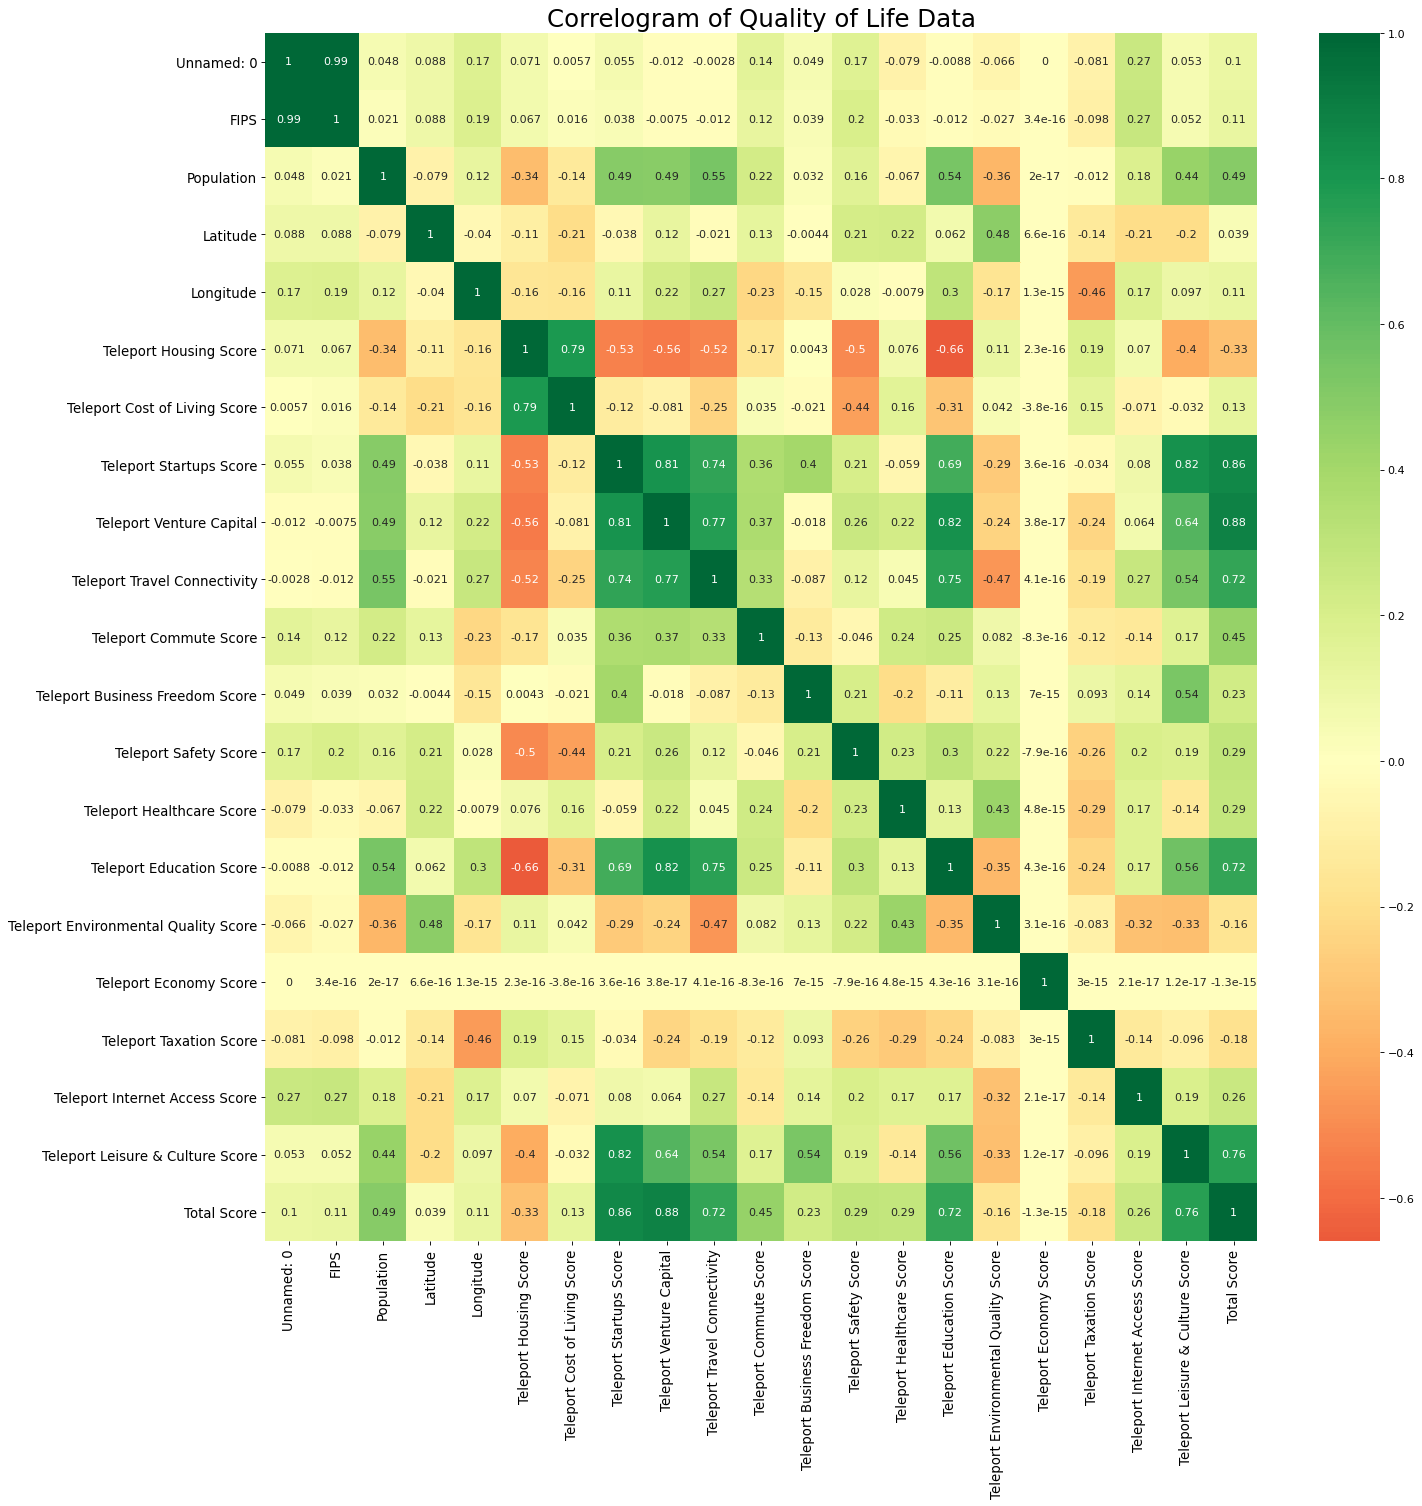

In [82]:
# Plot
plt.figure(figsize=(20,20), dpi= 80)
sns.heatmap(combined_data.corr(), xticklabels=combined_data.corr().columns, yticklabels=combined_data.corr().columns, cmap='RdYlGn', center=0, annot=True)

# Decorations
plt.title('Correlogram of Quality of Life Data', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig("CombinedCorrelogramScores.png")
plt.show()

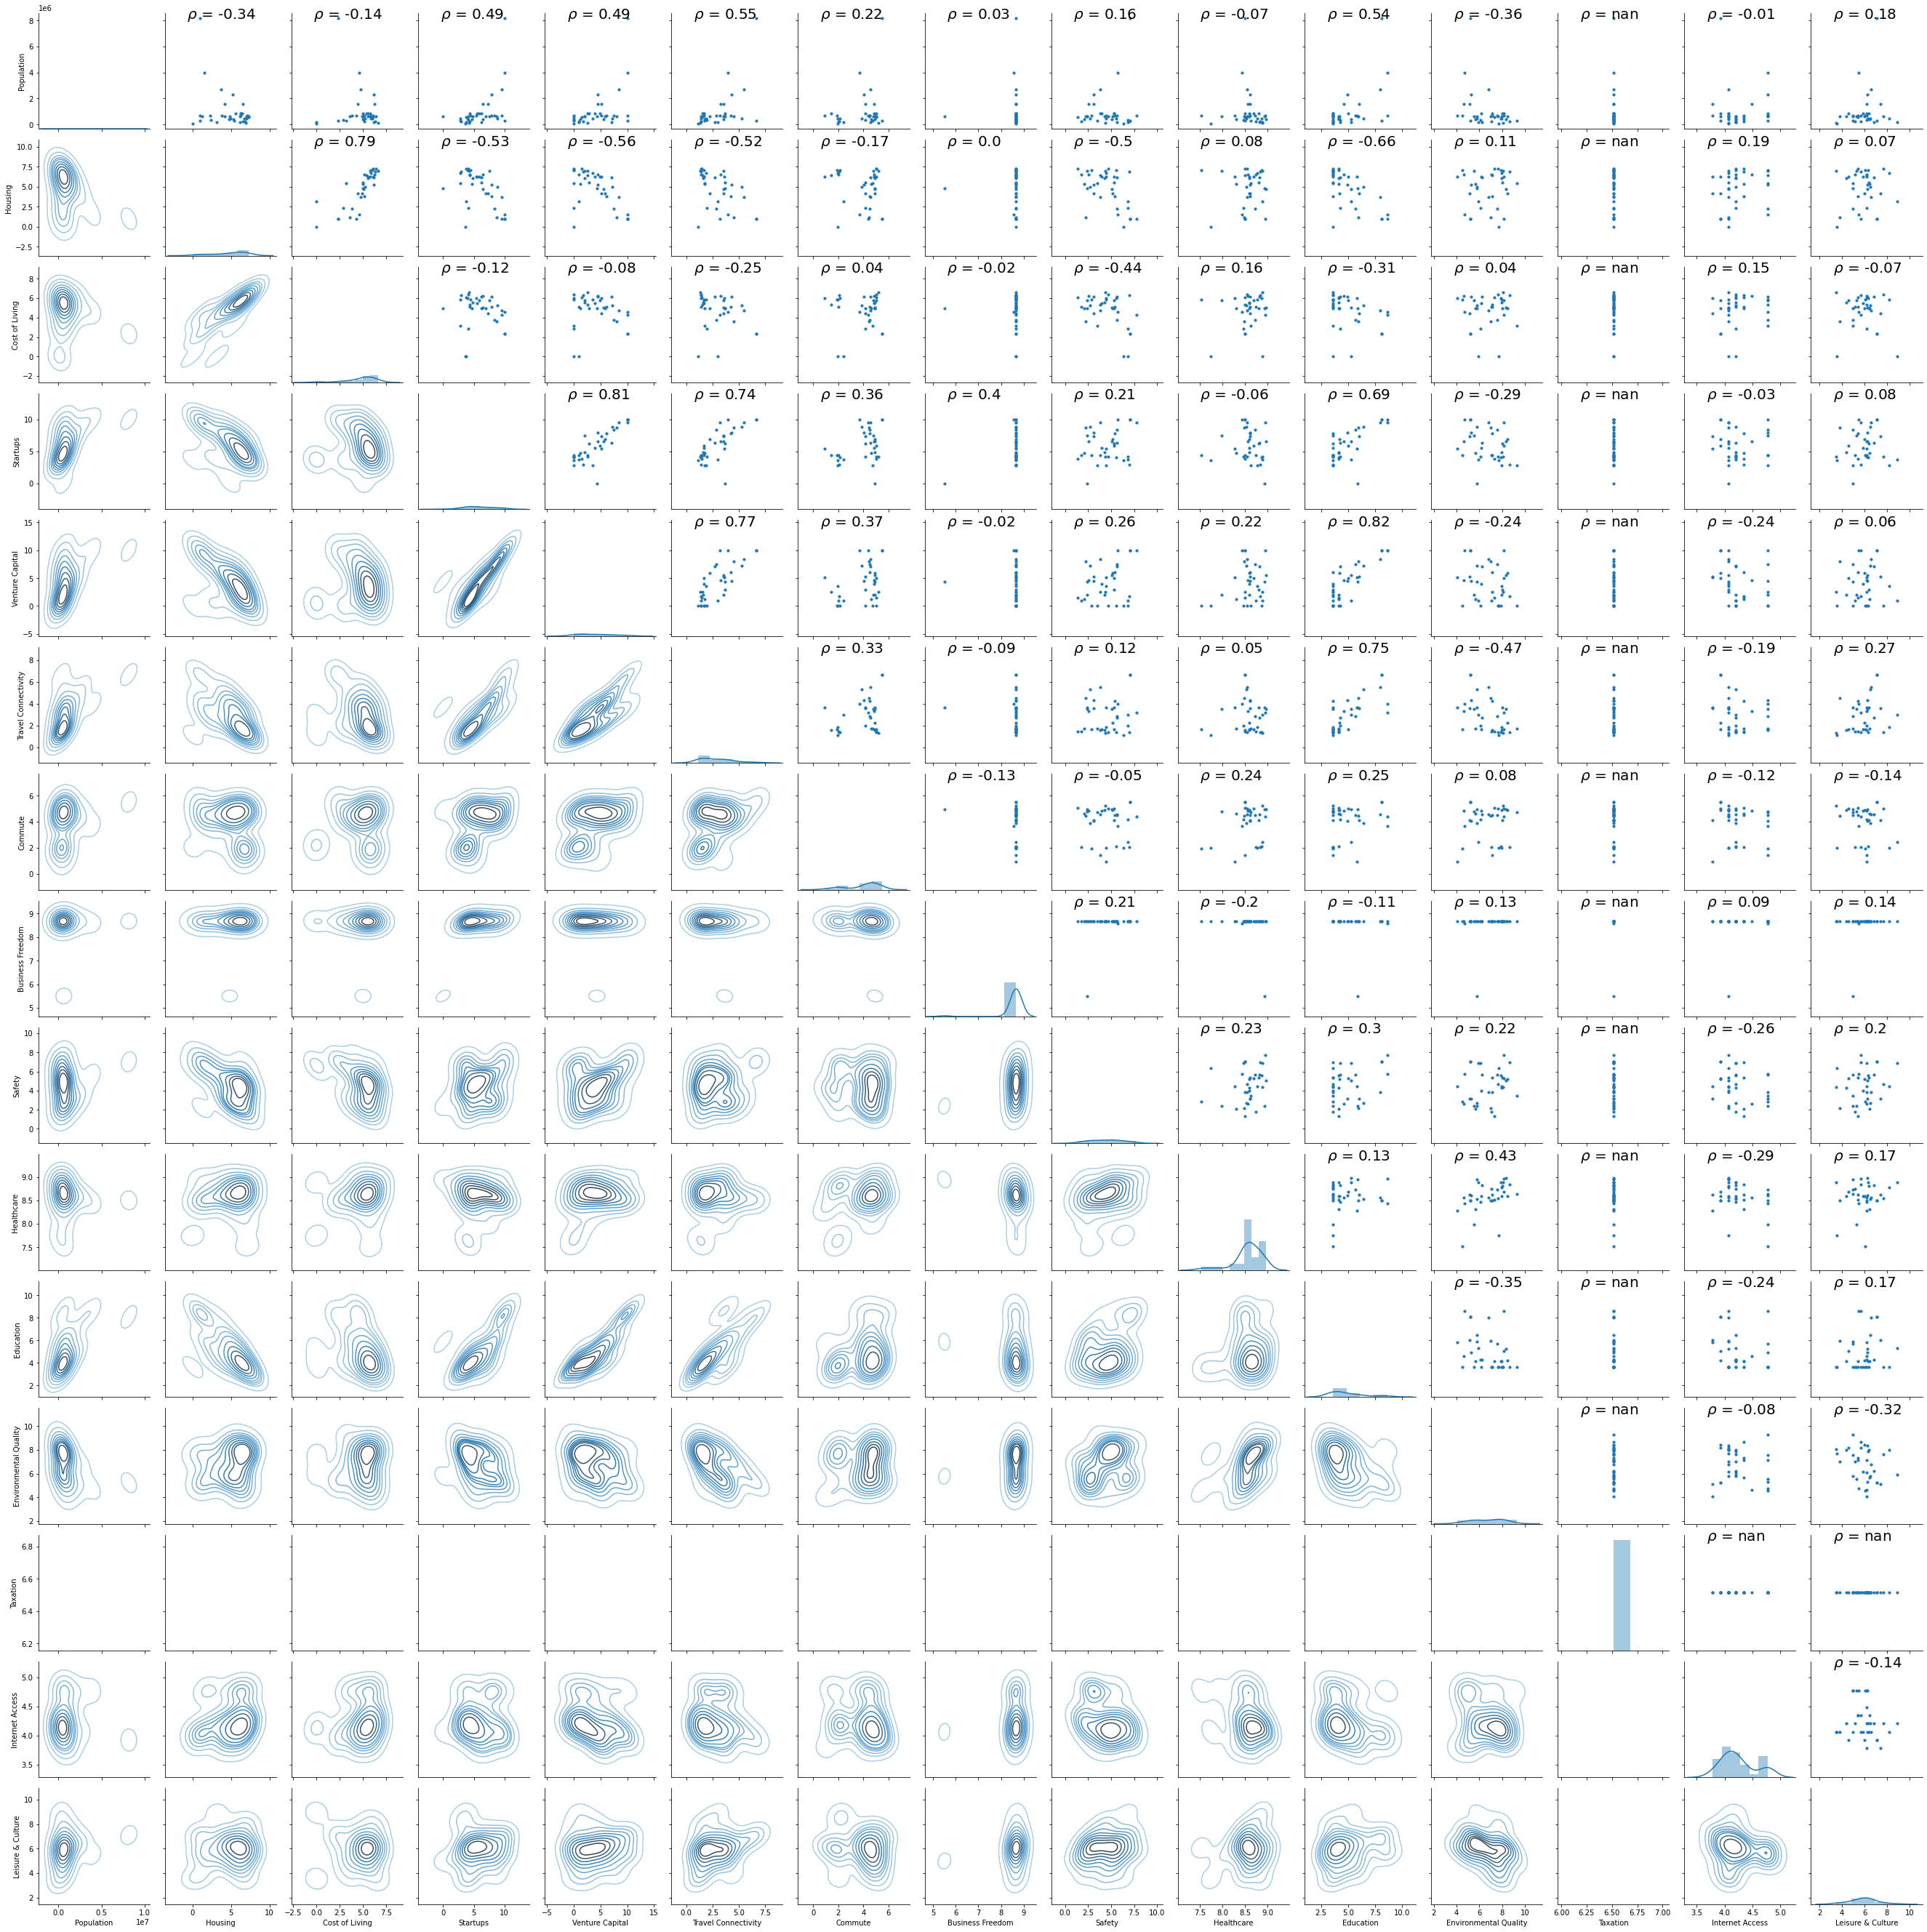

In [83]:
# Function to calculate correlation coefficient between two arrays
def corr(x, y, **kwargs):
    
    # Calculate the value
    coef = np.corrcoef(x, y)[0][1]
    # Make the label
    label = r'$\rho$ = ' + str(round(coef, 2))
    
    # Add the label to the plot
    ax = plt.gca()
    ax.annotate(label, xy = (0.2, 0.95), size = 20, xycoords = ax.transAxes)
    

# Map the plots to the locations
g = sns.PairGrid(lgst_cities, palette=["red"])
g.map_upper(plt.scatter, s=10)
g.map_upper(corr)
g.map_diag(sns.distplot, kde=True)
g.map_lower(sns.kdeplot, cmap="Blues_d")
plt.savefig("CombinedPearsonRGrid.png")

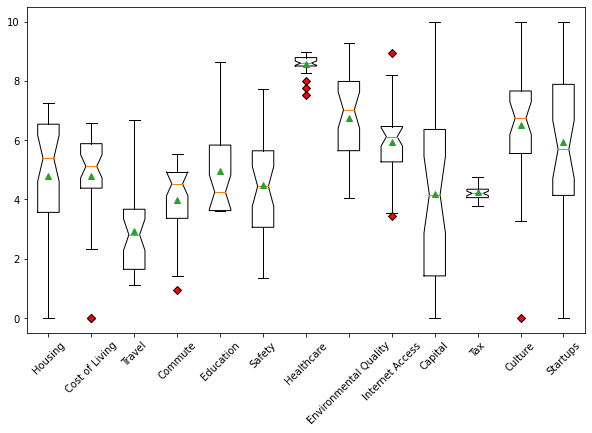

In [84]:

labels = ['Housing', 'Cost of Living', 'Travel', 'Commute',
          'Education', 'Safety', 'Healthcare', 'Environmental Quality', 'Internet Access', 'Capital', 'Tax', 'Culture', 'Startups']

areas= [housing, living, travel, commute, education, safety, health, environment, internet, capital, tax, culture, startup]

diamond = dict(markerfacecolor='r', marker='D')

ax1.set_title('Quality of Life Scores for Major U.S. Cities')
ax1.yaxis.grid(True)
ax1.set_xlabel('Areas of Scoring')
ax1.set_ylabel('Scores out of 10')
fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.boxplot(areas, labels=labels, notch=True, flierprops=diamond, showmeans=True)
plt.xticks(rotation = 45) 

plt.savefig("CombinedBoxPlot.png")
plt.show()

In [85]:
#Sort Total Scores to find top 5 and bottom 5 rated cities

combined_sorted = combined_data.sort_values(by = 'Total Score', ascending = False, ignore_index=True)
combined_sorted

ccities= combined_sorted['City']
chousing= combined_sorted['Teleport Housing Score']
cliving= combined_sorted['Teleport Cost of Living Score']
ctravel= combined_sorted['Teleport Travel Connectivity']
ccommute= combined_sorted['Teleport Commute Score']
ceducation= combined_sorted['Teleport Education Score']
csafety= combined_sorted['Teleport Safety Score']
chealth= combined_sorted['Teleport Healthcare Score']
cenvironment= combined_sorted['Teleport Environmental Quality Score']
cinternet= combined_sorted['Teleport Internet Access Score']
ccapital= combined_sorted['Teleport Venture Capital']
ctax= combined_sorted['Teleport Taxation Score']
cculture= combined_sorted['Teleport Leisure & Culture Score']
cbusiness= combined_sorted['Teleport Business Freedom Score']
cstartup= combined_sorted['Teleport Startups Score']

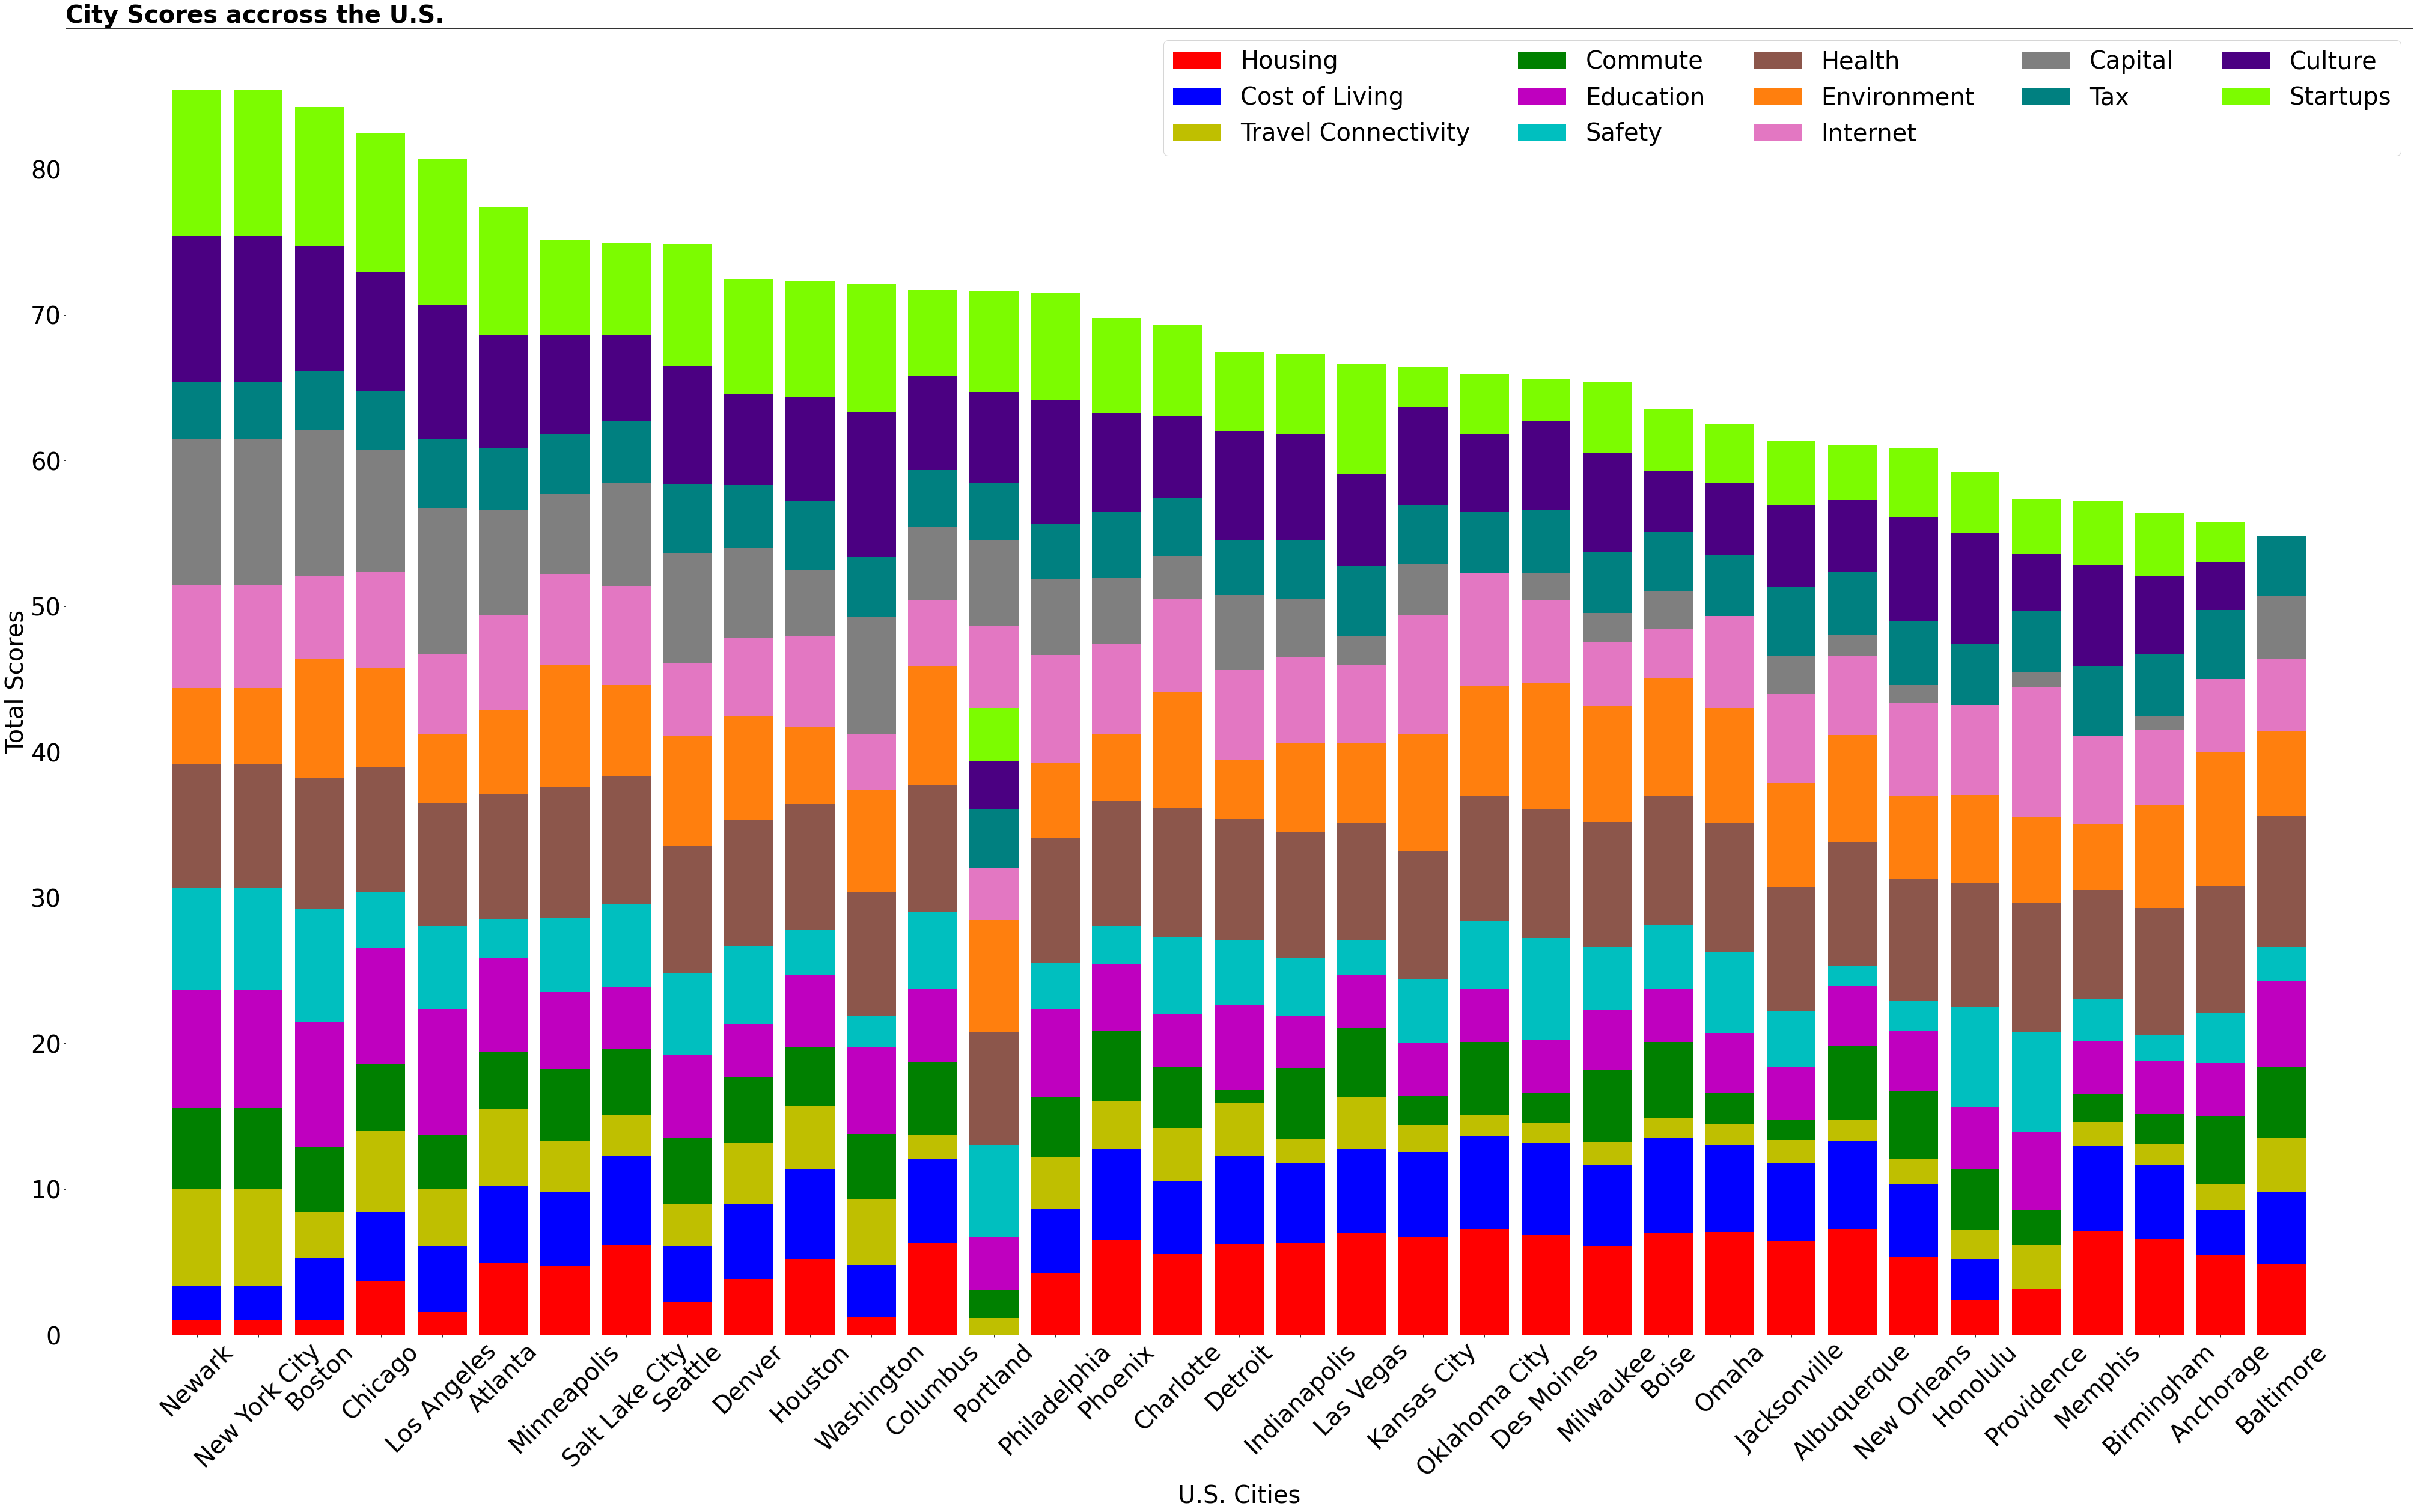

In [86]:
# importing package
import matplotlib.pyplot as plt
import numpy as np


fig, ax = plt.subplots(1, figsize=(70, 40))
# create data
x = ccities
y1 = np.array(chousing)
y2 = np.array(cliving)
y3 = np.array(ctravel)
y4 = np.array(ccommute)
y5 = np.array(ceducation)
y6 = np.array(csafety)
y7 = np.array(chealth)
y8 = np.array(cenvironment)
y9 = np.array(cinternet)
y10 = np.array(ccapital)
y11 = np.array(ctax)
y12 = np.array(cculture)
y13 = np.array(cstartup)
  
# plot bars in stack manner
plt.bar(x, y1, color='r')
plt.bar(x, y2, bottom=y1, color='b')
plt.bar(x, y3, bottom=y1+y2, color='y')
plt.bar(x, y4, bottom=y1+y2+y3, color='g')
plt.bar(x, y5, bottom=y1+y2+y3+y4, color='m')
plt.bar(x, y6, bottom=y1+y2+y3+y4+y5, color='c')
plt.bar(x, y7, bottom=y1+y2+y3+y4+y5+y6, color='tab:brown')
plt.bar(x, y8, bottom=y1+y2+y3+y4+y5+y6+y7, color='tab:orange')
plt.bar(x, y9, bottom=y1+y2+y3+y4+y5+y6+y7+y8, color='tab:pink')
plt.bar(x, y10, bottom=y1+y2+y3+y4+y5+y6+y7+y8+y9, color='tab:gray')
plt.bar(x, y11, bottom=y1+y2+y3+y4+y5+y6+y7+y8+y9+y10, color='teal')
plt.bar(x, y12, bottom=y1+y2+y3+y4+y5+y6+y7+y8+y9+y10+y11, color='indigo')
plt.bar(x, y13, bottom=y1+y2+y3+y4+y5+y6+y7+y8+y9+y10+y11+y12, color='lawngreen')

plt.xlabel("U.S. Cities", fontsize=40)
plt.ylabel("Total Scores", fontsize=40)
plt.legend(["Housing", "Cost of Living", "Travel Connectivity", "Commute", "Education", "Safety", "Health", "Environment", 
           "Internet", "Capital", "Tax", "Culture", "Startups"],loc='upper right', ncol = 5, fontsize=40)
plt.title("City Scores accross the U.S.", loc ='left', fontsize=40, weight='bold')
fig.align_labels()
plt.xticks(fontsize=40,rotation = 45) # Rotates X-Axis Ticks by 45-degrees
plt.yticks(fontsize=40)
plt.savefig("CombinedSortedCityScores.png")
plt.show()

In [87]:
# Create a map usingcoordinates to set markers

marker_locations = combined_data[['Latitude', 'Longitude']].astype(float)

# Create a heat_layer 

fig = gmaps.figure()

heat_layer = gmaps.heatmap_layer(marker_locations, weights = totalc,
                                 dissipating=False, max_intensity=np.max(totalc), 
                                point_radius=1.0)
fig.add_layer(heat_layer)
fig

Figure(layout=FigureLayout(height='420px'))